In [2]:
from yolo import *
import sys
sys.path[1] = '/Users/vishwajit/.pyenv/versions/3.7.3/lib/python3.7/site-packages'
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from matplotlib.patches import Rectangle
from matplotlib import pyplot
%matplotlib inline

In [3]:
model = make_yolov3_model()

In [4]:
weight_reader = WeightReader('yolov3.weights')

In [5]:
weight_reader.load_weights(model)

loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weights of convolution #32

In [53]:
labels = ["person", "bicycle", "car", "motorbike", "bus", "train", "truck",
     "traffic light" ]

In [ ]:
image_path = 'test_images/test8.jpg'
image = cv2.imread(image_path)
image_h, image_w, _ = image.shape
net_h,net_w = 416,416
new_image = preprocess_input(image, net_h, net_w)
# make prediction
yhat = model.predict(new_image)
# define the anchors
anchors = [[116,90,  156,198,  373,326],  [30,61, 62,45,  59,119], [10,13,  16,30,  33,23]]
# define the probability threshold for detected objects
class_threshold = 0.7
boxes = list()
for i in range(len(yhat)):
    # decode the output of the network
    boxes += decode_netout(yhat[i][0], anchors[i], class_threshold, input_h, input_w)
correct_yolo_boxes(boxes, image_h, image_w, net_h, net_w)
do_nms(boxes, 0.45)
img = draw_boxes(image, boxes, labels, 0.6)

In [14]:
cv2.imwrite(image_path[:-4] + '_detected' + image_path[-4:], (img).astype('uint8'))

True

In [ ]:
cv2.imshow('image',img)

In [54]:
def pipeline(image,obj_thresh=0.7,nms_thresh=0.6):
    image_h, image_w, _ = image.shape
    net_h,net_w = 416,416
    new_image = preprocess_input(image, net_h, net_w)
    yhat = model.predict(new_image)
    anchors = [[116,90,  156,198,  373,326],  [30,61, 62,45,  59,119], [10,13,  16,30,  33,23]]
    class_threshold = obj_thresh
    boxes = list()
    for i in range(len(yhat)):
        boxes += decode_netout(yhat[i][0], anchors[i], class_threshold, net_h, net_w)
    correct_yolo_boxes(boxes, image_h, image_w, net_h, net_w)
    do_nms(boxes, nms_thresh)
    det_img = draw_boxes(image, boxes, labels, obj_thresh)
    return det_img

In [55]:
image_path = 'test_images/test8.jpg'
image = cv2.imread(image_path)
img = pipeline(image,nms_thresh=0.7)

car: 89.63398337364197%
car: 95.3558623790741%


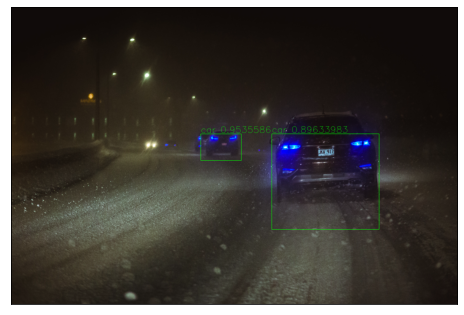

In [56]:
pyplot.figure(figsize=(8,6))
pyplot.imshow(img)
pyplot.xticks([])
pyplot.yticks([])
pyplot.show()

In [51]:
# Apply it on a video
from moviepy.editor import VideoFileClip
project_video_output = 'project_video_output.mp4'
clip1 = VideoFileClip("project_video.mp4")
lane_clip = clip1.fl_image(pipeline)
%time lane_clip.write_videofile(project_video_output, audio=False)

t:   0%|          | 0/1260 [00:00<?, ?it/s, now=None]

Moviepy - Building video project_video_output.mp4.
Moviepy - Writing video project_video_output.mp4



t:   0%|          | 2/1260 [00:07<1:22:56,  3.96s/it, now=None]

car: 75.5306601524353%


t:   1%|          | 12/1260 [01:28<2:46:56,  8.03s/it, now=None]

car: 72.84120917320251%


t:   8%|▊         | 100/1260 [13:45<2:40:34,  8.31s/it, now=None]

car: 78.38548421859741%


t:   8%|▊         | 102/1260 [14:02<2:40:45,  8.33s/it, now=None]

car: 76.28598213195801%


t:   8%|▊         | 106/1260 [14:36<2:40:35,  8.35s/it, now=None]

car: 90.35761952400208%


t:   8%|▊         | 107/1260 [14:44<2:40:08,  8.33s/it, now=None]

car: 89.23759460449219%


t:   9%|▊         | 108/1260 [14:53<2:40:07,  8.34s/it, now=None]

car: 88.53333592414856%
car: 72.80005216598511%


t:   9%|▊         | 110/1260 [15:09<2:40:50,  8.39s/it, now=None]

car: 88.94397616386414%


t:   9%|▉         | 111/1260 [15:18<2:40:53,  8.40s/it, now=None]

car: 71.36327028274536%


t:   9%|▉         | 112/1260 [15:26<2:41:15,  8.43s/it, now=None]

car: 90.68487286567688%


t:   9%|▉         | 113/1260 [15:34<2:38:50,  8.31s/it, now=None]

car: 90.57599902153015%
car: 81.83907866477966%


t:   9%|▉         | 114/1260 [15:42<2:36:22,  8.19s/it, now=None]

car: 77.31284499168396%
car: 79.45731282234192%


t:   9%|▉         | 115/1260 [15:50<2:35:42,  8.16s/it, now=None]

car: 87.48223185539246%
car: 83.7731122970581%


t:   9%|▉         | 116/1260 [15:59<2:36:41,  8.22s/it, now=None]

car: 92.23597645759583%


t:   9%|▉         | 117/1260 [16:07<2:35:35,  8.17s/it, now=None]

car: 84.71404910087585%


t:   9%|▉         | 118/1260 [16:15<2:36:05,  8.20s/it, now=None]

car: 91.35809540748596%
car: 74.32847023010254%


t:   9%|▉         | 119/1260 [16:25<2:43:45,  8.61s/it, now=None]

car: 90.63361287117004%
car: 90.31113982200623%


t:  10%|▉         | 120/1260 [16:33<2:40:43,  8.46s/it, now=None]

car: 80.04730343818665%
car: 80.75371384620667%


t:  10%|▉         | 122/1260 [16:49<2:38:30,  8.36s/it, now=None]

car: 74.38591122627258%


t:  10%|▉         | 123/1260 [16:57<2:37:58,  8.34s/it, now=None]

car: 90.70248007774353%
car: 91.33293628692627%
car: 71.27371430397034%


t:  10%|▉         | 124/1260 [17:06<2:38:33,  8.37s/it, now=None]

car: 90.00937342643738%
car: 87.80874013900757%
car: 80.33634424209595%


t:  10%|▉         | 125/1260 [17:14<2:36:46,  8.29s/it, now=None]

car: 92.96966791152954%
car: 73.51984977722168%
car: 86.94473505020142%


t:  10%|█         | 126/1260 [17:22<2:34:43,  8.19s/it, now=None]

car: 92.35804677009583%
car: 77.4523913860321%
car: 82.99846649169922%


t:  10%|█         | 127/1260 [17:30<2:36:30,  8.29s/it, now=None]

car: 83.75532627105713%
car: 92.80354976654053%
car: 94.24927830696106%


t:  10%|█         | 128/1260 [17:39<2:36:00,  8.27s/it, now=None]

car: 89.90902304649353%
car: 92.91676878929138%


t:  10%|█         | 129/1260 [17:47<2:34:04,  8.17s/it, now=None]

car: 96.13081216812134%
car: 91.876620054245%


t:  10%|█         | 130/1260 [17:55<2:36:03,  8.29s/it, now=None]

car: 92.30269193649292%
car: 91.26570224761963%


t:  10%|█         | 131/1260 [18:03<2:35:36,  8.27s/it, now=None]

car: 95.61595320701599%
car: 89.616858959198%


t:  10%|█         | 132/1260 [18:11<2:33:56,  8.19s/it, now=None]

car: 87.4798834323883%
car: 79.35024499893188%


t:  11%|█         | 133/1260 [18:19<2:32:45,  8.13s/it, now=None]

car: 90.5523955821991%
car: 89.43860530853271%


t:  11%|█         | 134/1260 [18:27<2:31:13,  8.06s/it, now=None]

car: 94.2659854888916%
car: 93.26316118240356%
car: 88.51062655448914%


t:  11%|█         | 135/1260 [18:35<2:31:01,  8.05s/it, now=None]

car: 95.92360854148865%
car: 95.55239677429199%


t:  11%|█         | 136/1260 [18:43<2:30:20,  8.03s/it, now=None]

car: 95.52778601646423%
car: 96.06168270111084%
car: 81.96669220924377%


t:  11%|█         | 137/1260 [18:52<2:31:11,  8.08s/it, now=None]

car: 96.3214635848999%
car: 93.45389604568481%
car: 81.44183158874512%


t:  11%|█         | 138/1260 [19:00<2:32:09,  8.14s/it, now=None]

car: 94.19680833816528%
car: 94.14277672767639%


t:  11%|█         | 139/1260 [19:08<2:33:42,  8.23s/it, now=None]

car: 95.64756155014038%
car: 93.86664628982544%


t:  11%|█         | 140/1260 [19:17<2:35:05,  8.31s/it, now=None]

car: 95.72189450263977%


t:  11%|█         | 141/1260 [19:25<2:36:15,  8.38s/it, now=None]

car: 97.37071990966797%


t:  11%|█▏        | 142/1260 [19:34<2:37:55,  8.48s/it, now=None]

car: 96.99465036392212%


t:  11%|█▏        | 143/1260 [19:42<2:35:30,  8.35s/it, now=None]

car: 96.94067239761353%


t:  11%|█▏        | 144/1260 [19:51<2:37:16,  8.46s/it, now=None]

car: 96.37640118598938%


t:  12%|█▏        | 145/1260 [20:00<2:39:02,  8.56s/it, now=None]

car: 98.06162714958191%


t:  12%|█▏        | 146/1260 [20:08<2:36:51,  8.45s/it, now=None]

car: 98.59668612480164%


t:  12%|█▏        | 147/1260 [20:16<2:36:36,  8.44s/it, now=None]

car: 98.56864213943481%


t:  12%|█▏        | 148/1260 [20:24<2:34:14,  8.32s/it, now=None]

car: 98.84422421455383%


t:  12%|█▏        | 149/1260 [20:33<2:35:08,  8.38s/it, now=None]

car: 98.9594042301178%


t:  12%|█▏        | 150/1260 [20:40<2:31:11,  8.17s/it, now=None]

car: 98.94145131111145%


t:  12%|█▏        | 151/1260 [20:49<2:33:30,  8.31s/it, now=None]

car: 98.89233112335205%


t:  12%|█▏        | 152/1260 [20:57<2:33:35,  8.32s/it, now=None]

car: 97.2525417804718%


t:  12%|█▏        | 153/1260 [21:06<2:34:48,  8.39s/it, now=None]

car: 96.88568711280823%


t:  12%|█▏        | 154/1260 [21:15<2:36:18,  8.48s/it, now=None]

car: 95.7728385925293%


t:  12%|█▏        | 155/1260 [21:24<2:38:37,  8.61s/it, now=None]

car: 96.1342990398407%


t:  12%|█▏        | 156/1260 [21:32<2:38:22,  8.61s/it, now=None]

car: 94.91061568260193%


t:  12%|█▏        | 157/1260 [21:41<2:39:38,  8.68s/it, now=None]

car: 96.74745798110962%


t:  13%|█▎        | 158/1260 [21:50<2:41:45,  8.81s/it, now=None]

car: 96.83904647827148%


t:  13%|█▎        | 159/1260 [21:59<2:41:30,  8.80s/it, now=None]

car: 95.78292965888977%
car: 70.44143080711365%


t:  13%|█▎        | 160/1260 [22:08<2:40:41,  8.76s/it, now=None]

car: 87.56213188171387%
car: 75.42369961738586%


t:  13%|█▎        | 161/1260 [22:16<2:39:56,  8.73s/it, now=None]

car: 95.02607583999634%


t:  13%|█▎        | 162/1260 [22:25<2:38:52,  8.68s/it, now=None]

car: 95.73055505752563%


t:  13%|█▎        | 163/1260 [22:33<2:38:30,  8.67s/it, now=None]

car: 93.44339370727539%


t:  13%|█▎        | 164/1260 [22:42<2:37:41,  8.63s/it, now=None]

car: 92.15416312217712%
car: 78.80394458770752%


t:  13%|█▎        | 165/1260 [22:51<2:38:03,  8.66s/it, now=None]

car: 91.9512391090393%
car: 71.87765836715698%


t:  13%|█▎        | 166/1260 [22:59<2:37:36,  8.64s/it, now=None]

car: 95.2284574508667%
car: 79.73396182060242%


t:  13%|█▎        | 167/1260 [23:08<2:36:44,  8.60s/it, now=None]

car: 89.75217342376709%
car: 80.67070245742798%


t:  13%|█▎        | 168/1260 [23:16<2:36:51,  8.62s/it, now=None]

car: 92.46302843093872%
car: 74.14019703865051%


t:  13%|█▎        | 169/1260 [23:25<2:35:59,  8.58s/it, now=None]

car: 94.28742527961731%
car: 71.76346778869629%


t:  13%|█▎        | 170/1260 [23:33<2:35:32,  8.56s/it, now=None]

car: 96.54788970947266%


t:  14%|█▎        | 171/1260 [23:42<2:34:57,  8.54s/it, now=None]

car: 96.76250219345093%


t:  14%|█▎        | 172/1260 [23:50<2:34:46,  8.54s/it, now=None]

car: 97.46786952018738%


t:  14%|█▎        | 173/1260 [23:59<2:34:52,  8.55s/it, now=None]

car: 98.35715889930725%
car: 76.19963884353638%


t:  14%|█▍        | 174/1260 [24:08<2:34:57,  8.56s/it, now=None]

car: 98.4215497970581%
car: 70.9934413433075%


t:  14%|█▍        | 175/1260 [24:16<2:35:14,  8.58s/it, now=None]

car: 98.6806571483612%
car: 72.78962135314941%


t:  14%|█▍        | 176/1260 [24:25<2:34:39,  8.56s/it, now=None]

car: 98.78864884376526%


t:  14%|█▍        | 177/1260 [24:33<2:34:09,  8.54s/it, now=None]

car: 98.86845350265503%
car: 75.82501173019409%


t:  14%|█▍        | 178/1260 [24:42<2:33:32,  8.51s/it, now=None]

car: 98.79425168037415%
car: 70.46380043029785%


t:  14%|█▍        | 179/1260 [24:50<2:33:15,  8.51s/it, now=None]

car: 98.29519987106323%
car: 70.40703296661377%


t:  14%|█▍        | 180/1260 [24:59<2:33:53,  8.55s/it, now=None]

car: 98.21738004684448%


t:  14%|█▍        | 181/1260 [25:07<2:33:08,  8.52s/it, now=None]

car: 98.31172227859497%


t:  14%|█▍        | 182/1260 [25:16<2:32:31,  8.49s/it, now=None]

car: 97.7300226688385%


t:  15%|█▍        | 183/1260 [25:24<2:32:27,  8.49s/it, now=None]

car: 98.24156165122986%
car: 79.50201034545898%


t:  15%|█▍        | 184/1260 [25:33<2:31:52,  8.47s/it, now=None]

car: 98.72568249702454%
car: 79.3749749660492%


t:  15%|█▍        | 185/1260 [25:41<2:31:58,  8.48s/it, now=None]

car: 98.77564907073975%
car: 76.96317434310913%


t:  15%|█▍        | 186/1260 [25:50<2:32:07,  8.50s/it, now=None]

car: 98.72205853462219%


t:  15%|█▍        | 187/1260 [25:58<2:32:02,  8.50s/it, now=None]

car: 98.12520742416382%


t:  15%|█▍        | 188/1260 [26:07<2:32:41,  8.55s/it, now=None]

car: 98.76865148544312%


t:  15%|█▌        | 189/1260 [26:15<2:32:19,  8.53s/it, now=None]

car: 98.39101433753967%


t:  15%|█▌        | 190/1260 [26:24<2:31:56,  8.52s/it, now=None]

car: 97.51749038696289%


t:  15%|█▌        | 191/1260 [26:32<2:31:27,  8.50s/it, now=None]

car: 97.48008847236633%


t:  15%|█▌        | 192/1260 [26:41<2:32:03,  8.54s/it, now=None]

car: 97.57551550865173%


t:  15%|█▌        | 193/1260 [26:49<2:31:36,  8.53s/it, now=None]

car: 97.78769612312317%


t:  15%|█▌        | 194/1260 [26:58<2:31:16,  8.51s/it, now=None]

car: 96.61829471588135%


t:  15%|█▌        | 195/1260 [27:06<2:30:36,  8.49s/it, now=None]

car: 97.40856289863586%


t:  16%|█▌        | 196/1260 [27:15<2:30:14,  8.47s/it, now=None]

car: 98.65084290504456%


t:  16%|█▌        | 197/1260 [27:23<2:29:56,  8.46s/it, now=None]

car: 97.69424796104431%


t:  16%|█▌        | 198/1260 [27:32<2:29:49,  8.46s/it, now=None]

car: 95.77841758728027%


t:  16%|█▌        | 199/1260 [27:40<2:29:33,  8.46s/it, now=None]

car: 97.54918217658997%


t:  16%|█▌        | 200/1260 [27:49<2:29:55,  8.49s/it, now=None]

car: 97.15870022773743%


t:  16%|█▌        | 201/1260 [27:57<2:30:18,  8.52s/it, now=None]

car: 97.66240119934082%


t:  16%|█▌        | 202/1260 [28:06<2:30:06,  8.51s/it, now=None]

car: 98.0481743812561%


t:  16%|█▌        | 203/1260 [28:14<2:29:33,  8.49s/it, now=None]

car: 98.63285422325134%


t:  16%|█▌        | 204/1260 [28:23<2:30:14,  8.54s/it, now=None]

car: 98.544180393219%


t:  16%|█▋        | 205/1260 [28:31<2:29:20,  8.49s/it, now=None]

car: 98.79534840583801%


t:  16%|█▋        | 206/1260 [28:40<2:28:57,  8.48s/it, now=None]

car: 98.73452186584473%


t:  16%|█▋        | 207/1260 [28:48<2:28:52,  8.48s/it, now=None]

car: 99.15444254875183%


t:  17%|█▋        | 208/1260 [28:57<2:28:22,  8.46s/it, now=None]

car: 99.1930603981018%


t:  17%|█▋        | 209/1260 [29:05<2:28:13,  8.46s/it, now=None]

car: 99.32241439819336%


t:  17%|█▋        | 210/1260 [29:13<2:27:51,  8.45s/it, now=None]

car: 99.20423626899719%


t:  17%|█▋        | 211/1260 [29:22<2:27:42,  8.45s/it, now=None]

car: 98.95554780960083%


t:  17%|█▋        | 212/1260 [29:30<2:27:35,  8.45s/it, now=None]

car: 98.87340664863586%


t:  17%|█▋        | 213/1260 [29:39<2:27:27,  8.45s/it, now=None]

car: 98.45597743988037%


t:  17%|█▋        | 214/1260 [29:47<2:27:13,  8.45s/it, now=None]

car: 98.49300384521484%


t:  17%|█▋        | 215/1260 [29:56<2:26:59,  8.44s/it, now=None]

car: 97.50589728355408%


t:  17%|█▋        | 216/1260 [30:04<2:27:25,  8.47s/it, now=None]

car: 98.0695903301239%


t:  17%|█▋        | 217/1260 [30:13<2:27:18,  8.47s/it, now=None]

car: 98.95033240318298%


t:  17%|█▋        | 218/1260 [30:21<2:27:05,  8.47s/it, now=None]

car: 98.44741225242615%


t:  17%|█▋        | 219/1260 [30:30<2:26:51,  8.46s/it, now=None]

car: 98.08362126350403%


t:  17%|█▋        | 220/1260 [30:38<2:26:35,  8.46s/it, now=None]

car: 98.73290061950684%


t:  18%|█▊        | 221/1260 [30:47<2:26:23,  8.45s/it, now=None]

car: 98.71663451194763%


t:  18%|█▊        | 222/1260 [30:55<2:26:06,  8.45s/it, now=None]

car: 99.1295576095581%


t:  18%|█▊        | 223/1260 [31:03<2:25:53,  8.44s/it, now=None]

car: 98.67984652519226%


t:  18%|█▊        | 224/1260 [31:12<2:25:37,  8.43s/it, now=None]

car: 99.04601573944092%


t:  18%|█▊        | 225/1260 [31:20<2:25:50,  8.45s/it, now=None]

car: 98.27540516853333%


t:  18%|█▊        | 226/1260 [31:29<2:25:28,  8.44s/it, now=None]

car: 97.22545742988586%


t:  18%|█▊        | 227/1260 [31:37<2:25:20,  8.44s/it, now=None]

car: 97.02340960502625%


t:  18%|█▊        | 228/1260 [31:46<2:26:05,  8.49s/it, now=None]

car: 97.92373776435852%


t:  18%|█▊        | 229/1260 [31:54<2:25:51,  8.49s/it, now=None]

car: 97.9889452457428%


t:  18%|█▊        | 230/1260 [32:03<2:25:16,  8.46s/it, now=None]

car: 98.26086759567261%


t:  18%|█▊        | 231/1260 [32:11<2:24:55,  8.45s/it, now=None]

car: 97.93959856033325%


t:  18%|█▊        | 232/1260 [32:20<2:24:56,  8.46s/it, now=None]

car: 97.9545533657074%


t:  18%|█▊        | 233/1260 [32:28<2:24:24,  8.44s/it, now=None]

car: 97.97326922416687%


t:  19%|█▊        | 234/1260 [32:36<2:24:18,  8.44s/it, now=None]

car: 97.71785736083984%


t:  19%|█▊        | 235/1260 [32:45<2:23:49,  8.42s/it, now=None]

car: 97.5748598575592%


t:  19%|█▊        | 236/1260 [32:53<2:23:30,  8.41s/it, now=None]

car: 97.16923832893372%


t:  19%|█▉        | 237/1260 [33:02<2:23:16,  8.40s/it, now=None]

car: 98.20452928543091%


t:  19%|█▉        | 238/1260 [33:10<2:23:22,  8.42s/it, now=None]

car: 97.5762665271759%


t:  19%|█▉        | 239/1260 [33:19<2:23:47,  8.45s/it, now=None]

car: 97.54865169525146%


t:  19%|█▉        | 240/1260 [33:27<2:24:23,  8.49s/it, now=None]

car: 97.60953783988953%


t:  19%|█▉        | 241/1260 [33:36<2:23:58,  8.48s/it, now=None]

car: 97.72756099700928%


t:  19%|█▉        | 242/1260 [33:44<2:23:52,  8.48s/it, now=None]

car: 96.92820310592651%


t:  19%|█▉        | 243/1260 [33:52<2:23:19,  8.46s/it, now=None]

car: 96.4220404624939%


t:  19%|█▉        | 244/1260 [34:01<2:23:00,  8.45s/it, now=None]

car: 97.22751975059509%


t:  19%|█▉        | 245/1260 [34:09<2:22:58,  8.45s/it, now=None]

car: 97.19154238700867%


t:  20%|█▉        | 246/1260 [34:18<2:22:51,  8.45s/it, now=None]

car: 98.62120747566223%


t:  20%|█▉        | 247/1260 [34:26<2:23:14,  8.48s/it, now=None]

car: 98.2307493686676%


t:  20%|█▉        | 248/1260 [34:35<2:23:07,  8.49s/it, now=None]

car: 98.94359111785889%


t:  20%|█▉        | 249/1260 [34:43<2:23:32,  8.52s/it, now=None]

car: 98.62346649169922%


t:  20%|█▉        | 250/1260 [34:52<2:23:01,  8.50s/it, now=None]

car: 98.51482510566711%


t:  20%|█▉        | 251/1260 [35:00<2:22:35,  8.48s/it, now=None]

car: 98.88519048690796%


t:  20%|██        | 252/1260 [35:09<2:22:48,  8.50s/it, now=None]

car: 99.18271899223328%


t:  20%|██        | 253/1260 [35:17<2:22:30,  8.49s/it, now=None]

car: 99.27473068237305%


t:  20%|██        | 254/1260 [35:26<2:22:24,  8.49s/it, now=None]

car: 99.1012692451477%


t:  20%|██        | 255/1260 [35:34<2:22:03,  8.48s/it, now=None]

car: 99.31138753890991%


t:  20%|██        | 256/1260 [35:43<2:22:21,  8.51s/it, now=None]

car: 99.17193055152893%


t:  20%|██        | 257/1260 [35:51<2:22:18,  8.51s/it, now=None]

car: 99.21684861183167%


t:  20%|██        | 258/1260 [36:00<2:22:10,  8.51s/it, now=None]

car: 99.44325089454651%


t:  21%|██        | 259/1260 [36:08<2:21:28,  8.48s/it, now=None]

car: 99.20257329940796%


t:  21%|██        | 260/1260 [36:17<2:21:23,  8.48s/it, now=None]

car: 99.61162805557251%


t:  21%|██        | 261/1260 [36:25<2:20:57,  8.47s/it, now=None]

car: 99.37304854393005%


t:  21%|██        | 262/1260 [36:34<2:21:05,  8.48s/it, now=None]

car: 98.97907376289368%


t:  21%|██        | 263/1260 [36:42<2:20:52,  8.48s/it, now=None]

car: 98.91639947891235%


t:  21%|██        | 264/1260 [36:51<2:21:10,  8.50s/it, now=None]

car: 98.9396870136261%


t:  21%|██        | 265/1260 [36:59<2:20:48,  8.49s/it, now=None]

car: 98.55253100395203%


t:  21%|██        | 266/1260 [37:08<2:20:59,  8.51s/it, now=None]

car: 98.7708032131195%


t:  21%|██        | 267/1260 [37:16<2:21:01,  8.52s/it, now=None]

car: 98.66840243339539%


t:  21%|██▏       | 268/1260 [37:25<2:20:33,  8.50s/it, now=None]

car: 98.08558225631714%


t:  21%|██▏       | 269/1260 [37:33<2:20:08,  8.48s/it, now=None]

car: 98.76736402511597%


t:  21%|██▏       | 270/1260 [37:42<2:20:08,  8.49s/it, now=None]

car: 98.80187511444092%


t:  22%|██▏       | 271/1260 [37:50<2:19:53,  8.49s/it, now=None]

car: 98.92239570617676%


t:  22%|██▏       | 272/1260 [37:59<2:20:02,  8.50s/it, now=None]

car: 98.86547923088074%


t:  22%|██▏       | 273/1260 [38:07<2:19:50,  8.50s/it, now=None]

car: 98.36353659629822%


t:  22%|██▏       | 274/1260 [38:16<2:19:29,  8.49s/it, now=None]

car: 98.8014817237854%


t:  22%|██▏       | 275/1260 [38:24<2:19:29,  8.50s/it, now=None]

car: 98.58332872390747%


t:  22%|██▏       | 276/1260 [38:33<2:19:49,  8.53s/it, now=None]

car: 97.88033962249756%


t:  22%|██▏       | 277/1260 [38:41<2:19:10,  8.49s/it, now=None]

car: 98.70076179504395%


t:  22%|██▏       | 278/1260 [38:50<2:18:31,  8.46s/it, now=None]

car: 97.50076532363892%


t:  22%|██▏       | 279/1260 [38:58<2:17:50,  8.43s/it, now=None]

car: 97.0072865486145%


t:  22%|██▏       | 280/1260 [39:06<2:17:37,  8.43s/it, now=None]

car: 98.44052195549011%
car: 82.25404024124146%


t:  22%|██▏       | 281/1260 [39:15<2:17:39,  8.44s/it, now=None]

car: 98.19239974021912%
car: 76.84994339942932%


t:  22%|██▏       | 282/1260 [39:23<2:17:51,  8.46s/it, now=None]

car: 97.5679099559784%
car: 85.31420826911926%


t:  22%|██▏       | 283/1260 [39:32<2:17:48,  8.46s/it, now=None]

car: 98.19093346595764%
car: 92.0514702796936%


t:  23%|██▎       | 284/1260 [39:40<2:17:43,  8.47s/it, now=None]

car: 98.05494546890259%
car: 92.41009950637817%


t:  23%|██▎       | 285/1260 [39:49<2:17:30,  8.46s/it, now=None]

car: 97.7497398853302%
car: 77.41880416870117%


t:  23%|██▎       | 286/1260 [39:57<2:17:14,  8.45s/it, now=None]

car: 97.0868468284607%
car: 81.9706678390503%


t:  23%|██▎       | 287/1260 [40:06<2:17:03,  8.45s/it, now=None]

car: 97.80778288841248%


t:  23%|██▎       | 288/1260 [40:14<2:17:41,  8.50s/it, now=None]

car: 96.94221615791321%


t:  23%|██▎       | 289/1260 [40:23<2:17:07,  8.47s/it, now=None]

car: 97.96441793441772%
car: 83.39723944664001%
car: 75.32969117164612%


t:  23%|██▎       | 290/1260 [40:31<2:17:10,  8.49s/it, now=None]

car: 97.32286930084229%
car: 75.08306503295898%


t:  23%|██▎       | 291/1260 [40:40<2:17:03,  8.49s/it, now=None]

car: 97.32828736305237%
car: 72.33018279075623%


t:  23%|██▎       | 292/1260 [40:48<2:17:18,  8.51s/it, now=None]

car: 97.61098027229309%


t:  23%|██▎       | 293/1260 [40:57<2:16:57,  8.50s/it, now=None]

car: 97.79809713363647%


t:  23%|██▎       | 294/1260 [41:05<2:16:41,  8.49s/it, now=None]

car: 97.64702320098877%


t:  23%|██▎       | 295/1260 [41:14<2:16:35,  8.49s/it, now=None]

car: 98.1825053691864%


t:  23%|██▎       | 296/1260 [41:22<2:16:20,  8.49s/it, now=None]

car: 97.94166684150696%


t:  24%|██▎       | 297/1260 [41:31<2:15:41,  8.45s/it, now=None]

car: 97.83665537834167%
car: 72.71469831466675%


t:  24%|██▎       | 298/1260 [41:39<2:15:54,  8.48s/it, now=None]

car: 98.10806512832642%


t:  24%|██▎       | 299/1260 [41:48<2:15:50,  8.48s/it, now=None]

car: 98.73731732368469%
car: 84.7786009311676%


t:  24%|██▍       | 300/1260 [41:56<2:16:20,  8.52s/it, now=None]

car: 97.28097915649414%
car: 78.26893925666809%


t:  24%|██▍       | 301/1260 [42:05<2:16:08,  8.52s/it, now=None]

car: 96.88175320625305%


t:  24%|██▍       | 302/1260 [42:13<2:15:28,  8.48s/it, now=None]

car: 97.16535210609436%


t:  24%|██▍       | 303/1260 [42:21<2:14:59,  8.46s/it, now=None]

car: 97.00868129730225%
car: 79.08939123153687%


t:  24%|██▍       | 304/1260 [42:30<2:14:56,  8.47s/it, now=None]

car: 97.6233959197998%
car: 74.0536630153656%


t:  24%|██▍       | 305/1260 [42:38<2:14:47,  8.47s/it, now=None]

car: 98.320072889328%
car: 70.21932601928711%


t:  24%|██▍       | 306/1260 [42:47<2:14:39,  8.47s/it, now=None]

car: 98.76575469970703%
car: 78.61502170562744%


t:  24%|██▍       | 307/1260 [42:55<2:14:36,  8.48s/it, now=None]

car: 98.24026226997375%
car: 85.68289875984192%


t:  24%|██▍       | 308/1260 [43:04<2:14:43,  8.49s/it, now=None]

car: 98.0839729309082%
car: 89.21178579330444%


t:  25%|██▍       | 309/1260 [43:12<2:14:33,  8.49s/it, now=None]

car: 98.54886531829834%
car: 83.08802247047424%


t:  25%|██▍       | 310/1260 [43:21<2:14:29,  8.49s/it, now=None]

car: 98.82250428199768%
car: 77.17090249061584%


t:  25%|██▍       | 311/1260 [43:29<2:13:59,  8.47s/it, now=None]

car: 99.18186664581299%
car: 72.45787978172302%


t:  25%|██▍       | 312/1260 [43:38<2:14:36,  8.52s/it, now=None]

car: 99.18556213378906%


t:  25%|██▍       | 313/1260 [43:46<2:14:00,  8.49s/it, now=None]

car: 99.01502728462219%


t:  25%|██▍       | 314/1260 [43:55<2:13:23,  8.46s/it, now=None]

car: 98.7750232219696%


t:  25%|██▌       | 315/1260 [44:03<2:13:13,  8.46s/it, now=None]

car: 98.65366816520691%


t:  25%|██▌       | 316/1260 [44:12<2:12:49,  8.44s/it, now=None]

car: 98.97639751434326%


t:  25%|██▌       | 317/1260 [44:20<2:12:59,  8.46s/it, now=None]

car: 98.89640212059021%


t:  25%|██▌       | 318/1260 [44:29<2:12:38,  8.45s/it, now=None]

car: 98.8627552986145%


t:  25%|██▌       | 319/1260 [44:37<2:12:28,  8.45s/it, now=None]

car: 97.93064594268799%


t:  25%|██▌       | 320/1260 [44:45<2:12:35,  8.46s/it, now=None]

car: 98.13818335533142%


t:  25%|██▌       | 321/1260 [44:54<2:12:23,  8.46s/it, now=None]

car: 96.71372771263123%


t:  26%|██▌       | 322/1260 [45:02<2:12:22,  8.47s/it, now=None]

car: 98.87094497680664%


t:  26%|██▌       | 323/1260 [45:11<2:12:20,  8.47s/it, now=None]

car: 98.41442704200745%


t:  26%|██▌       | 324/1260 [45:20<2:12:59,  8.52s/it, now=None]

car: 98.33735823631287%


t:  26%|██▌       | 325/1260 [45:28<2:12:34,  8.51s/it, now=None]

car: 98.6382782459259%


t:  26%|██▌       | 326/1260 [45:37<2:12:17,  8.50s/it, now=None]

car: 98.38674664497375%


t:  26%|██▌       | 327/1260 [45:45<2:11:36,  8.46s/it, now=None]

car: 97.90706634521484%


t:  26%|██▌       | 328/1260 [45:53<2:11:06,  8.44s/it, now=None]

car: 98.59590530395508%


t:  26%|██▌       | 329/1260 [46:02<2:10:59,  8.44s/it, now=None]

car: 98.15844297409058%


t:  26%|██▌       | 330/1260 [46:10<2:10:46,  8.44s/it, now=None]

car: 98.27593564987183%


t:  26%|██▋       | 331/1260 [46:19<2:10:37,  8.44s/it, now=None]

car: 97.54732251167297%


t:  26%|██▋       | 332/1260 [46:27<2:09:38,  8.38s/it, now=None]

car: 98.23471903800964%


t:  26%|██▋       | 333/1260 [46:35<2:10:10,  8.43s/it, now=None]

car: 98.92050623893738%


t:  27%|██▋       | 334/1260 [46:44<2:09:57,  8.42s/it, now=None]

car: 98.0477511882782%


t:  27%|██▋       | 335/1260 [46:52<2:09:47,  8.42s/it, now=None]

car: 97.84610271453857%


t:  27%|██▋       | 336/1260 [47:01<2:10:31,  8.48s/it, now=None]

car: 97.98338413238525%


t:  27%|██▋       | 337/1260 [47:09<2:10:34,  8.49s/it, now=None]

car: 93.79497766494751%


t:  27%|██▋       | 338/1260 [47:18<2:10:33,  8.50s/it, now=None]

car: 95.65856456756592%


t:  27%|██▋       | 339/1260 [47:26<2:10:19,  8.49s/it, now=None]

car: 97.75832891464233%


t:  27%|██▋       | 340/1260 [47:35<2:10:15,  8.50s/it, now=None]

car: 98.64530563354492%


t:  27%|██▋       | 341/1260 [47:43<2:10:04,  8.49s/it, now=None]

car: 98.78453612327576%


t:  27%|██▋       | 342/1260 [47:52<2:09:32,  8.47s/it, now=None]

car: 98.78647327423096%


t:  27%|██▋       | 343/1260 [48:00<2:09:48,  8.49s/it, now=None]

car: 98.2501208782196%


t:  27%|██▋       | 344/1260 [48:09<2:09:59,  8.51s/it, now=None]

car: 99.42527413368225%


t:  27%|██▋       | 345/1260 [48:17<2:10:33,  8.56s/it, now=None]

car: 98.81867170333862%


t:  27%|██▋       | 346/1260 [48:26<2:10:36,  8.57s/it, now=None]

car: 99.03181195259094%


t:  28%|██▊       | 347/1260 [48:35<2:10:29,  8.58s/it, now=None]

car: 98.96689653396606%


t:  28%|██▊       | 348/1260 [48:43<2:10:31,  8.59s/it, now=None]

car: 98.56756925582886%
car: 75.65101981163025%


t:  28%|██▊       | 349/1260 [48:52<2:10:18,  8.58s/it, now=None]

car: 99.06924962997437%
car: 86.64209246635437%


t:  28%|██▊       | 350/1260 [49:00<2:09:50,  8.56s/it, now=None]

car: 98.83191585540771%
car: 76.99872255325317%


t:  28%|██▊       | 351/1260 [49:09<2:09:25,  8.54s/it, now=None]

car: 98.85854125022888%
car: 70.17959356307983%
car: 80.45150637626648%


t:  28%|██▊       | 352/1260 [49:18<2:09:40,  8.57s/it, now=None]

car: 97.94076681137085%
car: 73.19982647895813%
car: 78.16475033760071%


t:  28%|██▊       | 353/1260 [49:26<2:09:31,  8.57s/it, now=None]

car: 98.8933801651001%
car: 90.799880027771%


t:  28%|██▊       | 354/1260 [49:35<2:09:04,  8.55s/it, now=None]

car: 98.93543720245361%
car: 95.88066339492798%


t:  28%|██▊       | 355/1260 [49:43<2:08:39,  8.53s/it, now=None]

car: 98.88470768928528%
car: 93.91111135482788%


t:  28%|██▊       | 356/1260 [49:52<2:08:12,  8.51s/it, now=None]

car: 99.15537238121033%
car: 92.64406561851501%


t:  28%|██▊       | 357/1260 [50:00<2:08:14,  8.52s/it, now=None]

car: 99.25281405448914%
car: 72.00405597686768%


t:  28%|██▊       | 358/1260 [50:09<2:08:25,  8.54s/it, now=None]

car: 99.10115599632263%
car: 72.23963141441345%
car: 90.92243909835815%


t:  28%|██▊       | 359/1260 [50:17<2:08:18,  8.54s/it, now=None]

car: 99.0666151046753%
car: 71.6459333896637%
car: 89.95798230171204%


t:  29%|██▊       | 360/1260 [50:26<2:09:16,  8.62s/it, now=None]

car: 99.30084943771362%


t:  29%|██▊       | 361/1260 [50:34<2:08:28,  8.57s/it, now=None]

car: 99.23765659332275%
car: 72.68698811531067%
car: 86.64785623550415%


t:  29%|██▊       | 362/1260 [50:43<2:08:14,  8.57s/it, now=None]

car: 99.19160604476929%
car: 73.28861951828003%
car: 89.66732621192932%


t:  29%|██▉       | 363/1260 [50:52<2:07:43,  8.54s/it, now=None]

car: 99.4532585144043%
car: 73.52814674377441%
car: 75.51584839820862%


t:  29%|██▉       | 364/1260 [51:00<2:07:33,  8.54s/it, now=None]

car: 99.12278056144714%
car: 88.42049837112427%


t:  29%|██▉       | 365/1260 [51:09<2:07:33,  8.55s/it, now=None]

car: 99.25752282142639%
car: 72.36899137496948%


t:  29%|██▉       | 366/1260 [51:17<2:07:33,  8.56s/it, now=None]

car: 99.22718405723572%
car: 71.4159369468689%


t:  29%|██▉       | 367/1260 [51:26<2:07:09,  8.54s/it, now=None]

car: 98.86376857757568%


t:  29%|██▉       | 368/1260 [51:34<2:07:01,  8.54s/it, now=None]

car: 99.01942610740662%
car: 93.20353269577026%


t:  29%|██▉       | 369/1260 [51:43<2:06:46,  8.54s/it, now=None]

car: 98.37589263916016%
car: 70.697021484375%
car: 93.51847767829895%


t:  29%|██▉       | 370/1260 [51:51<2:06:13,  8.51s/it, now=None]

car: 98.98800253868103%
car: 79.89991903305054%
car: 92.34806299209595%


t:  29%|██▉       | 371/1260 [52:00<2:06:19,  8.53s/it, now=None]

car: 98.8483190536499%
car: 83.3112359046936%
car: 93.1428074836731%


t:  30%|██▉       | 372/1260 [52:08<2:06:14,  8.53s/it, now=None]

car: 98.14808964729309%
car: 74.58017468452454%


t:  30%|██▉       | 373/1260 [52:17<2:06:53,  8.58s/it, now=None]

car: 97.47016429901123%
car: 97.85904288291931%


t:  30%|██▉       | 374/1260 [52:26<2:06:45,  8.58s/it, now=None]

car: 98.58543872833252%
car: 97.57377505302429%


t:  30%|██▉       | 375/1260 [52:34<2:06:43,  8.59s/it, now=None]

car: 98.23436737060547%
car: 97.20750451087952%


t:  30%|██▉       | 376/1260 [52:43<2:06:23,  8.58s/it, now=None]

car: 98.30386638641357%
car: 71.9598650932312%
car: 81.93612694740295%


t:  30%|██▉       | 377/1260 [52:51<2:06:09,  8.57s/it, now=None]

car: 97.05610275268555%
car: 71.93328738212585%
car: 72.77737259864807%
car: 98.1450617313385%


t:  30%|███       | 378/1260 [53:00<2:05:48,  8.56s/it, now=None]

car: 98.05067777633667%
car: 98.59327673912048%


t:  30%|███       | 379/1260 [53:08<2:05:58,  8.58s/it, now=None]

car: 98.06714653968811%
car: 98.25391173362732%


t:  30%|███       | 380/1260 [53:17<2:05:53,  8.58s/it, now=None]

car: 97.68427610397339%
car: 98.91793131828308%


t:  30%|███       | 381/1260 [53:26<2:05:44,  8.58s/it, now=None]

car: 98.2734203338623%
car: 77.0172655582428%
car: 97.54843711853027%


t:  30%|███       | 382/1260 [53:34<2:05:38,  8.59s/it, now=None]

car: 98.36052060127258%
car: 73.20882678031921%
car: 97.70938158035278%


t:  30%|███       | 383/1260 [53:43<2:05:21,  8.58s/it, now=None]

car: 83.72549414634705%
car: 76.70350670814514%
car: 98.086017370224%


t:  30%|███       | 384/1260 [53:52<2:05:43,  8.61s/it, now=None]

car: 82.33012557029724%
car: 75.19870400428772%
car: 98.92198443412781%


t:  31%|███       | 385/1260 [54:00<2:05:11,  8.59s/it, now=None]

car: 70.51547765731812%
car: 98.98234605789185%


t:  31%|███       | 386/1260 [54:09<2:05:06,  8.59s/it, now=None]

car: 98.96172285079956%


t:  31%|███       | 387/1260 [54:17<2:04:07,  8.53s/it, now=None]

car: 99.08501505851746%


t:  31%|███       | 388/1260 [54:26<2:04:05,  8.54s/it, now=None]

car: 98.5941231250763%


t:  31%|███       | 389/1260 [54:34<2:03:50,  8.53s/it, now=None]

car: 75.12341141700745%
car: 99.3725836277008%


t:  31%|███       | 390/1260 [54:43<2:03:33,  8.52s/it, now=None]

car: 77.38956809043884%
car: 98.94749522209167%


t:  31%|███       | 391/1260 [54:51<2:03:10,  8.50s/it, now=None]

car: 77.63344645500183%
car: 99.2007315158844%


t:  31%|███       | 392/1260 [55:00<2:03:07,  8.51s/it, now=None]

car: 76.60608887672424%
car: 97.96386361122131%


t:  31%|███       | 393/1260 [55:08<2:03:36,  8.55s/it, now=None]

car: 78.90716791152954%
car: 99.1358995437622%


t:  31%|███▏      | 394/1260 [55:17<2:03:33,  8.56s/it, now=None]

car: 94.61480975151062%
car: 82.11526274681091%
car: 99.15344715118408%


t:  31%|███▏      | 395/1260 [55:25<2:03:23,  8.56s/it, now=None]

car: 96.85729146003723%
car: 77.02464461326599%
car: 99.36147332191467%


t:  31%|███▏      | 396/1260 [55:34<2:02:59,  8.54s/it, now=None]

car: 75.37800669670105%
car: 99.11609888076782%


t:  32%|███▏      | 397/1260 [55:42<2:03:13,  8.57s/it, now=None]

car: 95.52167057991028%
car: 74.69790577888489%
car: 98.97105097770691%


t:  32%|███▏      | 398/1260 [55:51<2:02:55,  8.56s/it, now=None]

car: 93.52274537086487%
car: 75.28508305549622%
car: 78.65506410598755%
car: 98.42646718025208%


t:  32%|███▏      | 399/1260 [56:00<2:02:54,  8.57s/it, now=None]

car: 93.37306022644043%
car: 75.49591064453125%
car: 80.39339184761047%
car: 97.74994254112244%


t:  32%|███▏      | 400/1260 [56:08<2:03:14,  8.60s/it, now=None]

car: 91.55387878417969%
car: 78.54451537132263%
car: 75.51611661911011%
car: 98.54116439819336%


t:  32%|███▏      | 401/1260 [56:17<2:03:09,  8.60s/it, now=None]

car: 95.2400267124176%
car: 72.5672960281372%
car: 86.49698495864868%
car: 99.36990737915039%


t:  32%|███▏      | 402/1260 [56:25<2:02:56,  8.60s/it, now=None]

car: 96.04142904281616%
car: 75.19219517707825%
car: 86.02354526519775%
car: 99.60079789161682%


t:  32%|███▏      | 403/1260 [56:34<2:02:30,  8.58s/it, now=None]

car: 90.66614508628845%
car: 77.63081789016724%
car: 79.82790470123291%
car: 99.46159720420837%


t:  32%|███▏      | 404/1260 [56:43<2:02:17,  8.57s/it, now=None]

car: 91.31420850753784%
car: 76.17350816726685%
car: 82.82604217529297%
car: 99.05384182929993%


t:  32%|███▏      | 405/1260 [56:51<2:01:53,  8.55s/it, now=None]

car: 93.76075863838196%
car: 77.29275226593018%
car: 80.22339344024658%
car: 99.3065357208252%


t:  32%|███▏      | 406/1260 [57:00<2:01:36,  8.54s/it, now=None]

car: 93.07101964950562%
car: 81.15105628967285%
car: 83.54501724243164%
car: 99.31379556655884%


t:  32%|███▏      | 407/1260 [57:08<2:01:58,  8.58s/it, now=None]

car: 84.2296838760376%
car: 79.90946769714355%
car: 80.62359690666199%
car: 99.22462105751038%


t:  32%|███▏      | 408/1260 [57:17<2:02:11,  8.60s/it, now=None]

car: 86.55943274497986%
car: 83.93059372901917%
car: 81.80798888206482%
car: 98.73865246772766%


t:  32%|███▏      | 409/1260 [57:26<2:02:38,  8.65s/it, now=None]

car: 92.81224608421326%
car: 83.31626653671265%
car: 84.51995849609375%
car: 99.41566586494446%


t:  33%|███▎      | 410/1260 [57:34<2:02:50,  8.67s/it, now=None]

car: 79.37668561935425%
car: 76.2484073638916%
car: 98.96575808525085%


t:  33%|███▎      | 411/1260 [57:43<2:02:56,  8.69s/it, now=None]

car: 89.35432434082031%
car: 80.91316819190979%
car: 99.03730154037476%


t:  33%|███▎      | 412/1260 [57:52<2:01:38,  8.61s/it, now=None]

car: 74.9383270740509%
car: 76.56917572021484%
car: 99.08978343009949%


t:  33%|███▎      | 413/1260 [58:00<2:01:06,  8.58s/it, now=None]

car: 76.71878337860107%
car: 78.27001810073853%
car: 99.27893280982971%


t:  33%|███▎      | 414/1260 [58:08<2:00:19,  8.53s/it, now=None]

car: 70.55913209915161%
car: 71.13686800003052%
car: 97.88334369659424%


t:  33%|███▎      | 415/1260 [58:17<2:00:01,  8.52s/it, now=None]

car: 70.36963701248169%
car: 98.34378361701965%


t:  33%|███▎      | 416/1260 [58:25<1:59:28,  8.49s/it, now=None]

car: 74.50656294822693%
car: 98.2894241809845%


t:  33%|███▎      | 417/1260 [58:34<1:58:59,  8.47s/it, now=None]

car: 98.48776459693909%


t:  33%|███▎      | 418/1260 [58:42<1:58:35,  8.45s/it, now=None]

car: 70.17765045166016%
car: 98.63053560256958%


t:  33%|███▎      | 419/1260 [58:51<1:58:10,  8.43s/it, now=None]

car: 73.82223010063171%
car: 98.0549156665802%


t:  33%|███▎      | 420/1260 [58:59<1:58:03,  8.43s/it, now=None]

car: 70.66795229911804%
car: 98.77379536628723%


t:  33%|███▎      | 421/1260 [59:08<1:58:21,  8.46s/it, now=None]

car: 95.53664922714233%


t:  33%|███▎      | 422/1260 [59:16<1:58:26,  8.48s/it, now=None]

car: 74.67867732048035%
car: 97.94751405715942%


t:  34%|███▎      | 423/1260 [59:25<1:58:30,  8.49s/it, now=None]

car: 70.68939208984375%
car: 97.81591892242432%


t:  34%|███▎      | 424/1260 [59:33<1:58:40,  8.52s/it, now=None]

car: 71.50283455848694%
car: 96.81968688964844%


t:  34%|███▎      | 425/1260 [59:42<1:58:33,  8.52s/it, now=None]

car: 70.10769248008728%
car: 97.26624488830566%


t:  34%|███▍      | 426/1260 [59:50<1:58:41,  8.54s/it, now=None]

car: 97.46468663215637%


t:  34%|███▍      | 427/1260 [59:59<1:58:34,  8.54s/it, now=None]

car: 97.71215319633484%


t:  34%|███▍      | 428/1260 [1:00:07<1:58:46,  8.56s/it, now=None]

car: 95.6576406955719%


t:  34%|███▍      | 429/1260 [1:00:16<1:58:28,  8.55s/it, now=None]

car: 70.51261067390442%
car: 95.43094038963318%


t:  34%|███▍      | 430/1260 [1:00:25<1:58:09,  8.54s/it, now=None]

car: 94.73468661308289%


t:  34%|███▍      | 431/1260 [1:00:33<1:57:45,  8.52s/it, now=None]

car: 94.25510764122009%


t:  34%|███▍      | 432/1260 [1:00:42<1:57:31,  8.52s/it, now=None]

car: 95.67021131515503%


t:  34%|███▍      | 433/1260 [1:00:50<1:58:08,  8.57s/it, now=None]

car: 91.63866639137268%


t:  34%|███▍      | 434/1260 [1:00:59<1:57:32,  8.54s/it, now=None]

car: 93.26509237289429%


t:  35%|███▍      | 435/1260 [1:01:07<1:57:21,  8.53s/it, now=None]

car: 95.23929953575134%


t:  35%|███▍      | 436/1260 [1:01:16<1:57:18,  8.54s/it, now=None]

car: 96.07441425323486%


t:  35%|███▍      | 437/1260 [1:01:24<1:57:09,  8.54s/it, now=None]

car: 95.84444761276245%


t:  35%|███▍      | 438/1260 [1:01:33<1:56:28,  8.50s/it, now=None]

car: 97.17267155647278%


t:  35%|███▍      | 439/1260 [1:01:41<1:56:26,  8.51s/it, now=None]

car: 96.2115228176117%


t:  35%|███▍      | 440/1260 [1:01:50<1:56:36,  8.53s/it, now=None]

car: 96.0004210472107%


t:  35%|███▌      | 441/1260 [1:01:58<1:56:27,  8.53s/it, now=None]

car: 95.28964161872864%


t:  35%|███▌      | 442/1260 [1:02:07<1:56:41,  8.56s/it, now=None]

car: 96.42937779426575%


t:  35%|███▌      | 443/1260 [1:02:16<1:56:28,  8.55s/it, now=None]

car: 95.63313126564026%


t:  35%|███▌      | 444/1260 [1:02:24<1:56:11,  8.54s/it, now=None]

car: 97.6915180683136%


t:  35%|███▌      | 445/1260 [1:02:33<1:56:27,  8.57s/it, now=None]

car: 96.39370441436768%


t:  35%|███▌      | 446/1260 [1:02:41<1:55:47,  8.53s/it, now=None]

car: 97.38349914550781%


t:  35%|███▌      | 447/1260 [1:02:50<1:55:41,  8.54s/it, now=None]

car: 97.65326380729675%


t:  36%|███▌      | 448/1260 [1:02:58<1:55:19,  8.52s/it, now=None]

car: 97.82084822654724%


t:  36%|███▌      | 449/1260 [1:03:07<1:55:14,  8.53s/it, now=None]

car: 98.06256890296936%


t:  36%|███▌      | 450/1260 [1:03:15<1:55:01,  8.52s/it, now=None]

car: 97.35150337219238%


t:  36%|███▌      | 451/1260 [1:03:24<1:54:53,  8.52s/it, now=None]

car: 98.13087582588196%


t:  36%|███▌      | 452/1260 [1:03:32<1:54:50,  8.53s/it, now=None]

car: 97.99704551696777%


t:  36%|███▌      | 453/1260 [1:03:41<1:54:51,  8.54s/it, now=None]

car: 98.17379117012024%


t:  36%|███▌      | 454/1260 [1:03:49<1:54:32,  8.53s/it, now=None]

car: 98.22499752044678%


t:  36%|███▌      | 455/1260 [1:03:58<1:54:39,  8.55s/it, now=None]

car: 97.95606732368469%


t:  36%|███▌      | 456/1260 [1:04:07<1:54:49,  8.57s/it, now=None]

car: 97.84590005874634%


t:  36%|███▋      | 457/1260 [1:04:15<1:54:43,  8.57s/it, now=None]

car: 97.2524881362915%


t:  36%|███▋      | 458/1260 [1:04:24<1:54:20,  8.55s/it, now=None]

car: 96.87221646308899%


t:  36%|███▋      | 459/1260 [1:04:32<1:54:06,  8.55s/it, now=None]

car: 96.536123752594%


t:  37%|███▋      | 460/1260 [1:04:41<1:53:25,  8.51s/it, now=None]

car: 97.87784218788147%


t:  37%|███▋      | 461/1260 [1:04:49<1:53:30,  8.52s/it, now=None]

car: 96.9883680343628%


t:  37%|███▋      | 462/1260 [1:04:58<1:53:09,  8.51s/it, now=None]

car: 96.01544141769409%


t:  37%|███▋      | 463/1260 [1:05:06<1:53:15,  8.53s/it, now=None]

car: 95.10961174964905%


t:  37%|███▋      | 464/1260 [1:05:15<1:52:54,  8.51s/it, now=None]

car: 97.5642442703247%


t:  37%|███▋      | 465/1260 [1:05:23<1:52:46,  8.51s/it, now=None]

car: 97.25232720375061%


t:  37%|███▋      | 466/1260 [1:05:32<1:52:43,  8.52s/it, now=None]

car: 95.51363587379456%


t:  37%|███▋      | 467/1260 [1:05:40<1:52:21,  8.50s/it, now=None]

car: 96.53687477111816%


t:  37%|███▋      | 468/1260 [1:05:49<1:52:05,  8.49s/it, now=None]

car: 98.12997579574585%


t:  37%|███▋      | 469/1260 [1:05:57<1:52:08,  8.51s/it, now=None]

car: 96.1898684501648%


t:  37%|███▋      | 470/1260 [1:06:05<1:50:21,  8.38s/it, now=None]

car: 94.3539023399353%


t:  37%|███▋      | 471/1260 [1:06:13<1:48:32,  8.25s/it, now=None]

car: 96.5258538722992%


t:  37%|███▋      | 472/1260 [1:06:22<1:50:10,  8.39s/it, now=None]

car: 95.39479613304138%


t:  38%|███▊      | 473/1260 [1:06:30<1:50:28,  8.42s/it, now=None]

car: 93.3867335319519%


t:  38%|███▊      | 474/1260 [1:06:39<1:51:04,  8.48s/it, now=None]

car: 95.35604119300842%


t:  38%|███▊      | 475/1260 [1:06:48<1:51:25,  8.52s/it, now=None]

car: 96.05265855789185%


t:  38%|███▊      | 476/1260 [1:06:56<1:51:16,  8.52s/it, now=None]

car: 96.54027819633484%


t:  38%|███▊      | 477/1260 [1:07:05<1:50:53,  8.50s/it, now=None]

car: 96.34582996368408%


t:  38%|███▊      | 478/1260 [1:07:13<1:50:56,  8.51s/it, now=None]

car: 95.0085997581482%


t:  38%|███▊      | 479/1260 [1:07:22<1:50:59,  8.53s/it, now=None]

car: 96.5985655784607%


t:  38%|███▊      | 480/1260 [1:07:30<1:50:38,  8.51s/it, now=None]

car: 94.11023259162903%


t:  38%|███▊      | 481/1260 [1:07:39<1:51:17,  8.57s/it, now=None]

car: 95.37201523780823%


t:  38%|███▊      | 482/1260 [1:07:47<1:51:00,  8.56s/it, now=None]

car: 96.06624245643616%


t:  38%|███▊      | 483/1260 [1:07:56<1:50:46,  8.55s/it, now=None]

car: 97.64111042022705%


t:  38%|███▊      | 484/1260 [1:08:04<1:50:23,  8.54s/it, now=None]

car: 98.23484420776367%


t:  38%|███▊      | 485/1260 [1:08:13<1:49:54,  8.51s/it, now=None]

car: 98.1421947479248%


t:  39%|███▊      | 486/1260 [1:08:21<1:49:40,  8.50s/it, now=None]

car: 96.7948853969574%


t:  39%|███▊      | 487/1260 [1:08:30<1:49:37,  8.51s/it, now=None]

car: 96.36936783790588%


t:  39%|███▊      | 488/1260 [1:08:39<1:49:49,  8.54s/it, now=None]

car: 97.2791075706482%


t:  39%|███▉      | 489/1260 [1:08:47<1:49:56,  8.56s/it, now=None]

car: 96.37461304664612%


t:  39%|███▉      | 490/1260 [1:08:56<1:49:32,  8.54s/it, now=None]

car: 95.91071009635925%


t:  39%|███▉      | 491/1260 [1:09:04<1:49:17,  8.53s/it, now=None]

car: 96.94249033927917%


t:  39%|███▉      | 492/1260 [1:09:13<1:48:57,  8.51s/it, now=None]

car: 97.0196008682251%


t:  39%|███▉      | 493/1260 [1:09:21<1:49:17,  8.55s/it, now=None]

car: 96.68154716491699%


t:  39%|███▉      | 494/1260 [1:09:30<1:49:00,  8.54s/it, now=None]

car: 96.051687002182%


t:  39%|███▉      | 495/1260 [1:09:38<1:48:46,  8.53s/it, now=None]

car: 95.85553407669067%


t:  39%|███▉      | 496/1260 [1:09:47<1:48:26,  8.52s/it, now=None]

car: 95.62767744064331%


t:  39%|███▉      | 497/1260 [1:09:55<1:47:56,  8.49s/it, now=None]

car: 97.37159013748169%


t:  40%|███▉      | 498/1260 [1:10:04<1:47:45,  8.49s/it, now=None]

car: 97.51861691474915%


t:  40%|███▉      | 499/1260 [1:10:12<1:47:46,  8.50s/it, now=None]

car: 97.22352027893066%


t:  40%|███▉      | 500/1260 [1:10:21<1:47:41,  8.50s/it, now=None]

car: 96.44008874893188%


t:  40%|███▉      | 501/1260 [1:10:29<1:47:33,  8.50s/it, now=None]

car: 94.35691833496094%


t:  40%|███▉      | 502/1260 [1:10:38<1:47:18,  8.49s/it, now=None]

car: 92.83207058906555%


t:  40%|███▉      | 503/1260 [1:10:46<1:47:26,  8.52s/it, now=None]

car: 93.96900534629822%


t:  40%|████      | 504/1260 [1:10:55<1:47:20,  8.52s/it, now=None]

car: 97.08030819892883%


t:  40%|████      | 505/1260 [1:11:03<1:47:38,  8.55s/it, now=None]

car: 96.33461833000183%


t:  40%|████      | 506/1260 [1:11:12<1:47:38,  8.57s/it, now=None]

car: 96.97025418281555%


t:  40%|████      | 507/1260 [1:11:21<1:47:29,  8.57s/it, now=None]

car: 95.88257670402527%


t:  40%|████      | 508/1260 [1:11:29<1:47:33,  8.58s/it, now=None]

car: 94.45927143096924%


t:  40%|████      | 509/1260 [1:11:38<1:47:21,  8.58s/it, now=None]

car: 96.02804780006409%


t:  40%|████      | 510/1260 [1:11:46<1:47:15,  8.58s/it, now=None]

car: 96.29631042480469%


t:  41%|████      | 511/1260 [1:11:55<1:46:55,  8.57s/it, now=None]

car: 93.40596199035645%


t:  41%|████      | 512/1260 [1:12:03<1:46:17,  8.53s/it, now=None]

car: 97.11233973503113%


t:  41%|████      | 513/1260 [1:12:12<1:46:04,  8.52s/it, now=None]

car: 96.34461402893066%


t:  41%|████      | 514/1260 [1:12:20<1:45:41,  8.50s/it, now=None]

car: 96.56748175621033%


t:  41%|████      | 515/1260 [1:12:29<1:45:28,  8.50s/it, now=None]

car: 93.7212586402893%


t:  41%|████      | 516/1260 [1:12:37<1:45:28,  8.51s/it, now=None]

car: 92.92497038841248%


t:  41%|████      | 517/1260 [1:12:46<1:45:38,  8.53s/it, now=None]

car: 94.80498433113098%


t:  41%|████      | 518/1260 [1:12:54<1:45:19,  8.52s/it, now=None]

car: 94.85165476799011%


t:  41%|████      | 519/1260 [1:13:03<1:45:00,  8.50s/it, now=None]

car: 96.61216139793396%


t:  41%|████▏     | 520/1260 [1:13:11<1:44:42,  8.49s/it, now=None]

car: 94.6497917175293%


t:  41%|████▏     | 521/1260 [1:13:20<1:44:40,  8.50s/it, now=None]

car: 94.49083805084229%


t:  41%|████▏     | 522/1260 [1:13:28<1:44:54,  8.53s/it, now=None]

car: 95.13603448867798%


t:  42%|████▏     | 523/1260 [1:13:37<1:45:00,  8.55s/it, now=None]

car: 96.36479616165161%


t:  42%|████▏     | 524/1260 [1:13:46<1:45:02,  8.56s/it, now=None]

car: 96.81408405303955%


t:  42%|████▏     | 525/1260 [1:13:54<1:44:45,  8.55s/it, now=None]

car: 96.41125798225403%


t:  42%|████▏     | 526/1260 [1:14:03<1:44:24,  8.53s/it, now=None]

car: 96.14964127540588%


t:  42%|████▏     | 527/1260 [1:14:11<1:43:59,  8.51s/it, now=None]

car: 96.24735713005066%


t:  42%|████▏     | 528/1260 [1:14:20<1:43:46,  8.51s/it, now=None]

car: 92.28872656822205%


t:  42%|████▏     | 529/1260 [1:14:28<1:44:23,  8.57s/it, now=None]

car: 94.69401240348816%


t:  42%|████▏     | 530/1260 [1:14:37<1:43:58,  8.55s/it, now=None]

car: 94.29448246955872%


t:  42%|████▏     | 531/1260 [1:14:45<1:43:42,  8.54s/it, now=None]

car: 93.25174689292908%


t:  42%|████▏     | 532/1260 [1:14:54<1:43:22,  8.52s/it, now=None]

car: 75.9167730808258%
car: 92.69946217536926%


t:  42%|████▏     | 533/1260 [1:15:02<1:42:55,  8.49s/it, now=None]

car: 77.85930037498474%
car: 93.7684714794159%


t:  42%|████▏     | 534/1260 [1:15:11<1:42:40,  8.49s/it, now=None]

car: 72.36648797988892%
car: 96.21133208274841%


t:  42%|████▏     | 535/1260 [1:15:19<1:42:39,  8.50s/it, now=None]

car: 96.22508883476257%


t:  43%|████▎     | 536/1260 [1:15:28<1:42:14,  8.47s/it, now=None]

car: 97.72068858146667%


t:  43%|████▎     | 537/1260 [1:15:36<1:42:13,  8.48s/it, now=None]

car: 97.60295748710632%


t:  43%|████▎     | 538/1260 [1:15:45<1:42:12,  8.49s/it, now=None]

car: 97.95875549316406%


t:  43%|████▎     | 539/1260 [1:15:53<1:42:03,  8.49s/it, now=None]

car: 97.53387570381165%


t:  43%|████▎     | 540/1260 [1:16:01<1:41:25,  8.45s/it, now=None]

car: 96.96741700172424%


t:  43%|████▎     | 541/1260 [1:16:10<1:41:43,  8.49s/it, now=None]

car: 95.3609049320221%


t:  43%|████▎     | 542/1260 [1:16:19<1:41:48,  8.51s/it, now=None]

car: 96.32017612457275%


t:  43%|████▎     | 543/1260 [1:16:27<1:41:41,  8.51s/it, now=None]

car: 95.52632570266724%


t:  43%|████▎     | 544/1260 [1:16:36<1:41:35,  8.51s/it, now=None]

car: 95.58427929878235%


t:  43%|████▎     | 545/1260 [1:16:44<1:41:28,  8.52s/it, now=None]

car: 96.06925845146179%


t:  43%|████▎     | 546/1260 [1:16:53<1:41:09,  8.50s/it, now=None]

car: 97.45630621910095%


t:  43%|████▎     | 547/1260 [1:17:01<1:41:03,  8.50s/it, now=None]

car: 97.0298171043396%


t:  43%|████▎     | 548/1260 [1:17:20<2:17:30, 11.59s/it, now=None]

car: 95.16195058822632%


t:  44%|████▎     | 549/1260 [1:17:43<2:58:48, 15.09s/it, now=None]

car: 96.280437707901%


t:  44%|████▎     | 550/1260 [1:17:52<2:35:04, 13.10s/it, now=None]

car: 98.09954762458801%


t:  44%|████▎     | 551/1260 [1:18:00<2:18:17, 11.70s/it, now=None]

car: 73.89695644378662%
car: 98.05710315704346%


t:  44%|████▍     | 552/1260 [1:18:09<2:06:58, 10.76s/it, now=None]

car: 97.26353883743286%


t:  44%|████▍     | 553/1260 [1:18:17<1:59:30, 10.14s/it, now=None]

car: 96.73349857330322%


t:  44%|████▍     | 554/1260 [1:18:26<1:53:34,  9.65s/it, now=None]

car: 96.46912217140198%


t:  44%|████▍     | 555/1260 [1:18:34<1:49:26,  9.31s/it, now=None]

car: 96.90632224082947%


t:  44%|████▍     | 556/1260 [1:18:43<1:46:16,  9.06s/it, now=None]

car: 96.48446440696716%


t:  44%|████▍     | 557/1260 [1:18:51<1:44:02,  8.88s/it, now=None]

car: 94.52536106109619%


t:  44%|████▍     | 558/1260 [1:19:00<1:42:44,  8.78s/it, now=None]

car: 96.3349461555481%


t:  44%|████▍     | 559/1260 [1:19:08<1:41:45,  8.71s/it, now=None]

car: 97.80800342559814%


t:  44%|████▍     | 560/1260 [1:19:17<1:40:55,  8.65s/it, now=None]

car: 98.30933213233948%


t:  45%|████▍     | 561/1260 [1:19:25<1:40:35,  8.63s/it, now=None]

car: 98.31735491752625%


t:  45%|████▍     | 562/1260 [1:19:34<1:39:47,  8.58s/it, now=None]

car: 97.91083335876465%


t:  45%|████▍     | 563/1260 [1:19:42<1:39:24,  8.56s/it, now=None]

car: 96.66141867637634%


t:  45%|████▍     | 564/1260 [1:19:51<1:39:25,  8.57s/it, now=None]

car: 96.3074803352356%


t:  45%|████▍     | 565/1260 [1:20:00<1:39:56,  8.63s/it, now=None]

car: 96.11943364143372%


t:  45%|████▍     | 566/1260 [1:20:08<1:39:44,  8.62s/it, now=None]

car: 95.1967179775238%


t:  45%|████▌     | 567/1260 [1:20:17<1:39:12,  8.59s/it, now=None]

car: 94.18172836303711%


t:  45%|████▌     | 568/1260 [1:20:26<1:39:01,  8.59s/it, now=None]

car: 76.41053199768066%
car: 96.02455496788025%


t:  45%|████▌     | 569/1260 [1:20:34<1:38:42,  8.57s/it, now=None]

car: 95.22157907485962%


t:  45%|████▌     | 570/1260 [1:20:43<1:38:17,  8.55s/it, now=None]

car: 95.5010712146759%


t:  45%|████▌     | 571/1260 [1:20:51<1:38:02,  8.54s/it, now=None]

car: 75.01005530357361%
car: 91.17071628570557%


t:  45%|████▌     | 572/1260 [1:21:00<1:38:35,  8.60s/it, now=None]

car: 72.08805084228516%
car: 89.05003070831299%


t:  45%|████▌     | 573/1260 [1:21:09<1:38:52,  8.64s/it, now=None]

car: 90.64480066299438%


t:  46%|████▌     | 574/1260 [1:21:17<1:38:46,  8.64s/it, now=None]

car: 92.36565828323364%


t:  46%|████▌     | 575/1260 [1:21:26<1:38:19,  8.61s/it, now=None]

car: 91.9044017791748%


t:  46%|████▌     | 576/1260 [1:21:34<1:37:55,  8.59s/it, now=None]

car: 85.29489636421204%


t:  46%|████▌     | 577/1260 [1:21:43<1:38:03,  8.61s/it, now=None]

car: 89.51904773712158%


t:  46%|████▌     | 578/1260 [1:21:51<1:37:34,  8.58s/it, now=None]

car: 93.77118945121765%


t:  46%|████▌     | 579/1260 [1:22:00<1:37:08,  8.56s/it, now=None]

car: 94.62685585021973%


t:  46%|████▌     | 580/1260 [1:22:09<1:37:06,  8.57s/it, now=None]

car: 93.83852481842041%


t:  46%|████▌     | 581/1260 [1:22:17<1:36:50,  8.56s/it, now=None]

car: 93.12073588371277%


t:  46%|████▌     | 582/1260 [1:22:26<1:36:27,  8.54s/it, now=None]

car: 92.54205226898193%


t:  46%|████▋     | 583/1260 [1:22:34<1:36:42,  8.57s/it, now=None]

car: 94.25036311149597%


t:  46%|████▋     | 584/1260 [1:22:43<1:36:15,  8.54s/it, now=None]

car: 94.92915868759155%


t:  46%|████▋     | 585/1260 [1:22:51<1:36:02,  8.54s/it, now=None]

car: 94.89890933036804%


t:  47%|████▋     | 586/1260 [1:23:00<1:35:47,  8.53s/it, now=None]

car: 96.65144085884094%


t:  47%|████▋     | 587/1260 [1:23:08<1:35:45,  8.54s/it, now=None]

car: 96.32205367088318%


t:  47%|████▋     | 588/1260 [1:23:17<1:35:31,  8.53s/it, now=None]

car: 96.36790156364441%


t:  47%|████▋     | 589/1260 [1:23:25<1:35:47,  8.57s/it, now=None]

car: 95.7241415977478%


t:  47%|████▋     | 590/1260 [1:23:34<1:35:44,  8.57s/it, now=None]

car: 92.23122000694275%


t:  47%|████▋     | 591/1260 [1:23:43<1:35:26,  8.56s/it, now=None]

car: 92.51188635826111%


t:  47%|████▋     | 592/1260 [1:23:51<1:35:20,  8.56s/it, now=None]

car: 90.95370173454285%


t:  47%|████▋     | 593/1260 [1:24:00<1:35:12,  8.56s/it, now=None]

car: 92.08018779754639%


t:  47%|████▋     | 594/1260 [1:24:08<1:35:11,  8.58s/it, now=None]

car: 90.65754413604736%


t:  47%|████▋     | 595/1260 [1:24:17<1:35:17,  8.60s/it, now=None]

car: 93.18205118179321%


t:  47%|████▋     | 596/1260 [1:24:26<1:35:04,  8.59s/it, now=None]

car: 86.12034320831299%


t:  47%|████▋     | 597/1260 [1:24:34<1:34:55,  8.59s/it, now=None]

car: 78.25364470481873%
car: 86.56330704689026%


t:  47%|████▋     | 598/1260 [1:24:43<1:34:48,  8.59s/it, now=None]

car: 71.93478345870972%
car: 89.4255518913269%


t:  48%|████▊     | 599/1260 [1:24:51<1:34:32,  8.58s/it, now=None]

car: 90.76257944107056%


t:  48%|████▊     | 600/1260 [1:25:00<1:34:34,  8.60s/it, now=None]

car: 91.44006371498108%


t:  48%|████▊     | 601/1260 [1:25:09<1:34:35,  8.61s/it, now=None]

car: 75.21352171897888%
car: 84.98088121414185%


t:  48%|████▊     | 602/1260 [1:25:17<1:34:10,  8.59s/it, now=None]

car: 70.10484337806702%
car: 88.75237107276917%


t:  48%|████▊     | 603/1260 [1:25:26<1:33:46,  8.56s/it, now=None]

car: 87.55337595939636%


t:  48%|████▊     | 604/1260 [1:25:34<1:33:25,  8.55s/it, now=None]

car: 85.5694830417633%


t:  48%|████▊     | 605/1260 [1:25:43<1:33:08,  8.53s/it, now=None]

car: 82.66919255256653%


t:  48%|████▊     | 606/1260 [1:25:51<1:32:50,  8.52s/it, now=None]

car: 95.39907574653625%


t:  48%|████▊     | 607/1260 [1:26:00<1:32:28,  8.50s/it, now=None]

car: 94.16407346725464%


t:  48%|████▊     | 608/1260 [1:26:08<1:32:07,  8.48s/it, now=None]

car: 96.62858843803406%


t:  48%|████▊     | 609/1260 [1:26:16<1:31:47,  8.46s/it, now=None]

car: 96.49239182472229%


t:  48%|████▊     | 610/1260 [1:26:25<1:31:31,  8.45s/it, now=None]

car: 94.8821485042572%


t:  48%|████▊     | 611/1260 [1:26:33<1:31:17,  8.44s/it, now=None]

car: 94.12127733230591%


t:  49%|████▊     | 612/1260 [1:26:41<1:30:40,  8.40s/it, now=None]

car: 92.39901900291443%


t:  49%|████▊     | 613/1260 [1:26:50<1:30:47,  8.42s/it, now=None]

car: 92.03710556030273%


t:  49%|████▊     | 614/1260 [1:26:58<1:30:15,  8.38s/it, now=None]

car: 94.99075412750244%


t:  49%|████▉     | 615/1260 [1:27:06<1:29:20,  8.31s/it, now=None]

car: 94.45880651473999%


t:  49%|████▉     | 616/1260 [1:27:15<1:28:42,  8.26s/it, now=None]

car: 95.9302008152008%


t:  49%|████▉     | 617/1260 [1:27:23<1:28:15,  8.24s/it, now=None]

car: 96.91284894943237%


t:  49%|████▉     | 618/1260 [1:27:31<1:28:11,  8.24s/it, now=None]

car: 96.05092406272888%


t:  49%|████▉     | 619/1260 [1:27:39<1:28:30,  8.29s/it, now=None]

car: 94.82263326644897%


t:  49%|████▉     | 620/1260 [1:27:48<1:28:08,  8.26s/it, now=None]

car: 96.41348123550415%


t:  49%|████▉     | 621/1260 [1:27:56<1:27:44,  8.24s/it, now=None]

car: 96.51117324829102%


t:  49%|████▉     | 622/1260 [1:28:04<1:27:33,  8.23s/it, now=None]

car: 94.68364119529724%


t:  49%|████▉     | 623/1260 [1:28:12<1:28:04,  8.30s/it, now=None]

car: 96.23939394950867%


t:  50%|████▉     | 624/1260 [1:28:21<1:28:13,  8.32s/it, now=None]

car: 96.70277833938599%


t:  50%|████▉     | 625/1260 [1:28:29<1:28:02,  8.32s/it, now=None]

car: 97.36388921737671%


t:  50%|████▉     | 626/1260 [1:28:37<1:28:02,  8.33s/it, now=None]

car: 96.76386713981628%


t:  50%|████▉     | 627/1260 [1:28:46<1:27:21,  8.28s/it, now=None]

car: 96.26520276069641%


t:  50%|████▉     | 628/1260 [1:28:54<1:27:25,  8.30s/it, now=None]

car: 96.2134301662445%


t:  50%|████▉     | 629/1260 [1:29:02<1:27:16,  8.30s/it, now=None]

car: 95.10801434516907%


t:  50%|█████     | 630/1260 [1:29:11<1:26:58,  8.28s/it, now=None]

car: 92.41470098495483%


t:  50%|█████     | 631/1260 [1:29:19<1:26:54,  8.29s/it, now=None]

car: 88.80248665809631%


t:  50%|█████     | 632/1260 [1:29:27<1:26:54,  8.30s/it, now=None]

car: 92.45901703834534%


t:  50%|█████     | 633/1260 [1:29:36<1:27:29,  8.37s/it, now=None]

car: 93.74459385871887%


t:  50%|█████     | 634/1260 [1:29:44<1:27:13,  8.36s/it, now=None]

car: 95.17099261283875%


t:  50%|█████     | 635/1260 [1:29:53<1:27:34,  8.41s/it, now=None]

car: 94.98791694641113%


t:  50%|█████     | 636/1260 [1:30:01<1:27:40,  8.43s/it, now=None]

car: 96.2712049484253%


t:  51%|█████     | 637/1260 [1:30:10<1:27:41,  8.44s/it, now=None]

car: 92.29748845100403%


t:  51%|█████     | 638/1260 [1:30:18<1:28:20,  8.52s/it, now=None]

car: 93.21592450141907%


t:  51%|█████     | 639/1260 [1:30:27<1:28:06,  8.51s/it, now=None]

car: 95.48282623291016%


t:  51%|█████     | 640/1260 [1:30:35<1:27:44,  8.49s/it, now=None]

car: 94.07433271408081%


t:  51%|█████     | 641/1260 [1:30:44<1:27:25,  8.47s/it, now=None]

car: 91.10602736473083%


t:  51%|█████     | 642/1260 [1:30:52<1:26:58,  8.44s/it, now=None]

car: 91.96963310241699%


t:  51%|█████     | 643/1260 [1:31:00<1:27:03,  8.47s/it, now=None]

car: 94.1194236278534%


t:  51%|█████     | 644/1260 [1:31:09<1:26:57,  8.47s/it, now=None]

car: 94.68024969100952%


t:  51%|█████     | 645/1260 [1:31:17<1:26:44,  8.46s/it, now=None]

car: 95.38759589195251%


t:  51%|█████▏    | 646/1260 [1:31:26<1:26:21,  8.44s/it, now=None]

car: 93.36618781089783%


t:  51%|█████▏    | 647/1260 [1:31:34<1:25:59,  8.42s/it, now=None]

car: 93.3860719203949%


t:  51%|█████▏    | 648/1260 [1:31:42<1:25:33,  8.39s/it, now=None]

car: 94.4796085357666%


t:  52%|█████▏    | 649/1260 [1:31:51<1:25:18,  8.38s/it, now=None]

car: 88.18960785865784%


t:  52%|█████▏    | 650/1260 [1:31:59<1:25:26,  8.40s/it, now=None]

car: 89.51150178909302%


t:  52%|█████▏    | 651/1260 [1:32:08<1:25:12,  8.39s/it, now=None]

car: 85.99041700363159%


t:  52%|█████▏    | 652/1260 [1:32:16<1:24:57,  8.38s/it, now=None]

car: 88.29792141914368%


t:  52%|█████▏    | 653/1260 [1:32:24<1:24:33,  8.36s/it, now=None]

car: 91.56325459480286%


t:  52%|█████▏    | 654/1260 [1:32:33<1:24:27,  8.36s/it, now=None]

car: 93.27301979064941%


t:  52%|█████▏    | 655/1260 [1:32:41<1:24:47,  8.41s/it, now=None]

car: 88.75405192375183%


t:  52%|█████▏    | 656/1260 [1:32:50<1:24:58,  8.44s/it, now=None]

car: 89.96915221214294%


t:  52%|█████▏    | 657/1260 [1:32:58<1:24:49,  8.44s/it, now=None]

car: 91.94645285606384%


t:  52%|█████▏    | 658/1260 [1:33:07<1:24:34,  8.43s/it, now=None]

car: 93.03340315818787%


t:  52%|█████▏    | 659/1260 [1:33:15<1:24:42,  8.46s/it, now=None]

car: 92.7250862121582%


t:  52%|█████▏    | 660/1260 [1:33:24<1:24:32,  8.45s/it, now=None]

car: 95.53619027137756%


t:  52%|█████▏    | 661/1260 [1:33:32<1:25:10,  8.53s/it, now=None]

car: 72.39546179771423%
car: 96.2222695350647%


t:  53%|█████▎    | 662/1260 [1:33:41<1:25:18,  8.56s/it, now=None]

car: 96.18746042251587%


t:  53%|█████▎    | 663/1260 [1:33:49<1:25:03,  8.55s/it, now=None]

car: 95.97337245941162%


t:  53%|█████▎    | 664/1260 [1:33:58<1:24:48,  8.54s/it, now=None]

car: 92.72375106811523%


t:  53%|█████▎    | 665/1260 [1:34:06<1:24:46,  8.55s/it, now=None]

car: 86.55254244804382%


t:  53%|█████▎    | 666/1260 [1:34:15<1:24:23,  8.52s/it, now=None]

car: 90.76473116874695%


t:  53%|█████▎    | 667/1260 [1:34:24<1:24:21,  8.54s/it, now=None]

car: 91.0279929637909%


t:  53%|█████▎    | 668/1260 [1:34:33<1:25:49,  8.70s/it, now=None]

car: 89.15125727653503%


t:  53%|█████▎    | 669/1260 [1:34:42<1:28:03,  8.94s/it, now=None]

car: 92.79001355171204%


t:  53%|█████▎    | 670/1260 [1:34:51<1:27:25,  8.89s/it, now=None]

car: 92.95529127120972%


t:  53%|█████▎    | 671/1260 [1:34:59<1:26:25,  8.80s/it, now=None]

car: 96.49360775947571%


t:  53%|█████▎    | 672/1260 [1:35:09<1:27:43,  8.95s/it, now=None]

car: 96.15975022315979%


t:  53%|█████▎    | 673/1260 [1:35:19<1:30:20,  9.23s/it, now=None]

car: 96.1862325668335%


t:  53%|█████▎    | 674/1260 [1:35:29<1:34:10,  9.64s/it, now=None]

car: 96.76767587661743%


t:  54%|█████▎    | 675/1260 [1:35:39<1:35:34,  9.80s/it, now=None]

car: 95.9360659122467%


t:  54%|█████▎    | 676/1260 [1:35:49<1:35:25,  9.80s/it, now=None]

car: 94.34592723846436%


t:  54%|█████▎    | 677/1260 [1:35:58<1:32:54,  9.56s/it, now=None]

car: 92.1060562133789%


t:  54%|█████▍    | 678/1260 [1:36:08<1:34:32,  9.75s/it, now=None]

car: 94.59609985351562%


t:  54%|█████▍    | 679/1260 [1:36:18<1:32:30,  9.55s/it, now=None]

car: 93.80052089691162%


t:  54%|█████▍    | 680/1260 [1:36:27<1:31:36,  9.48s/it, now=None]

car: 92.9417610168457%


t:  54%|█████▍    | 681/1260 [1:36:37<1:33:30,  9.69s/it, now=None]

car: 92.85080432891846%


t:  54%|█████▍    | 682/1260 [1:36:48<1:35:48,  9.94s/it, now=None]

car: 81.60379528999329%
car: 95.19829750061035%


t:  54%|█████▍    | 683/1260 [1:36:59<1:39:22, 10.33s/it, now=None]

car: 80.42356967926025%
car: 94.59113478660583%


t:  54%|█████▍    | 684/1260 [1:37:08<1:37:20, 10.14s/it, now=None]

car: 75.40545463562012%
car: 94.75659132003784%


t:  54%|█████▍    | 685/1260 [1:37:19<1:38:49, 10.31s/it, now=None]

car: 84.41265225410461%
car: 96.42202854156494%


t:  54%|█████▍    | 686/1260 [1:37:32<1:45:00, 10.98s/it, now=None]

car: 83.91295075416565%
car: 96.38059735298157%


t:  55%|█████▍    | 687/1260 [1:37:43<1:46:26, 11.15s/it, now=None]

car: 92.8526222705841%
car: 93.98521780967712%


t:  55%|█████▍    | 688/1260 [1:37:55<1:46:55, 11.22s/it, now=None]

car: 87.23280429840088%
car: 93.62732172012329%


t:  55%|█████▍    | 689/1260 [1:38:07<1:49:12, 11.48s/it, now=None]

car: 90.36996364593506%
car: 95.32843232154846%


t:  55%|█████▍    | 690/1260 [1:38:18<1:48:26, 11.41s/it, now=None]

car: 88.58062028884888%
car: 94.5957899093628%


t:  55%|█████▍    | 691/1260 [1:38:29<1:47:19, 11.32s/it, now=None]

car: 78.72205376625061%
car: 91.87296628952026%


t:  55%|█████▍    | 692/1260 [1:38:41<1:50:05, 11.63s/it, now=None]

car: 71.218341588974%
car: 90.71093797683716%


t:  55%|█████▌    | 693/1260 [1:38:54<1:52:59, 11.96s/it, now=None]

car: 87.11491823196411%
car: 91.82601571083069%


t:  55%|█████▌    | 694/1260 [1:39:05<1:50:34, 11.72s/it, now=None]

car: 92.99685955047607%
car: 92.01740622520447%


t:  55%|█████▌    | 695/1260 [1:39:21<2:01:00, 12.85s/it, now=None]

car: 95.58433890342712%
car: 94.94918584823608%


t:  55%|█████▌    | 696/1260 [1:39:48<2:42:27, 17.28s/it, now=None]

car: 95.75713276863098%
car: 96.27041220664978%


t:  55%|█████▌    | 697/1260 [1:40:06<2:42:20, 17.30s/it, now=None]

car: 98.39279055595398%
car: 97.39179015159607%


t:  55%|█████▌    | 698/1260 [1:40:17<2:25:20, 15.52s/it, now=None]

car: 97.84983396530151%
car: 96.96110486984253%


t:  55%|█████▌    | 699/1260 [1:40:29<2:14:07, 14.35s/it, now=None]

car: 97.9241132736206%
car: 96.91061973571777%


t:  56%|█████▌    | 700/1260 [1:40:40<2:04:35, 13.35s/it, now=None]

car: 96.98762893676758%
car: 97.59721755981445%


t:  56%|█████▌    | 701/1260 [1:40:51<1:59:06, 12.79s/it, now=None]

car: 97.30675220489502%
car: 97.72303700447083%


t:  56%|█████▌    | 702/1260 [1:41:05<2:02:07, 13.13s/it, now=None]

car: 98.64782094955444%
car: 97.49433994293213%


t:  56%|█████▌    | 703/1260 [1:41:19<2:04:44, 13.44s/it, now=None]

car: 98.49737286567688%
car: 98.2556939125061%


t:  56%|█████▌    | 704/1260 [1:41:34<2:09:14, 13.95s/it, now=None]

car: 97.97520637512207%
car: 97.89915084838867%


t:  56%|█████▌    | 705/1260 [1:41:48<2:07:04, 13.74s/it, now=None]

car: 98.43207001686096%
car: 97.46409058570862%


t:  56%|█████▌    | 706/1260 [1:42:19<2:54:04, 18.85s/it, now=None]

car: 97.8651762008667%
car: 97.01882600784302%


t:  56%|█████▌    | 707/1260 [1:42:30<2:32:46, 16.58s/it, now=None]

car: 98.34700226783752%
car: 97.8150725364685%


t:  56%|█████▌    | 708/1260 [1:42:45<2:29:21, 16.23s/it, now=None]

car: 98.76439571380615%
car: 97.98315763473511%


t:  56%|█████▋    | 709/1260 [1:43:13<3:00:51, 19.69s/it, now=None]

car: 98.93040060997009%
car: 98.1207549571991%


t:  56%|█████▋    | 710/1260 [1:43:26<2:41:42, 17.64s/it, now=None]

car: 98.80338311195374%
car: 97.99084663391113%


t:  56%|█████▋    | 711/1260 [1:43:37<2:24:29, 15.79s/it, now=None]

car: 98.32780361175537%
car: 97.26792573928833%


t:  57%|█████▋    | 712/1260 [1:43:49<2:12:00, 14.45s/it, now=None]

car: 98.07921051979065%
car: 96.67880535125732%


t:  57%|█████▋    | 713/1260 [1:44:01<2:05:25, 13.76s/it, now=None]

car: 97.0032274723053%
car: 96.54947519302368%


t:  57%|█████▋    | 714/1260 [1:44:13<2:01:07, 13.31s/it, now=None]

car: 96.94300293922424%
car: 96.91587686538696%


t:  57%|█████▋    | 715/1260 [1:44:25<1:57:28, 12.93s/it, now=None]

car: 95.91352939605713%
car: 96.75527215003967%


t:  57%|█████▋    | 716/1260 [1:44:37<1:54:36, 12.64s/it, now=None]

car: 95.57878375053406%
car: 96.94309830665588%


t:  57%|█████▋    | 717/1260 [1:44:49<1:51:58, 12.37s/it, now=None]

car: 95.92958688735962%
car: 94.75587010383606%


t:  57%|█████▋    | 718/1260 [1:45:01<1:49:57, 12.17s/it, now=None]

car: 93.26916337013245%
car: 94.41310167312622%


t:  57%|█████▋    | 719/1260 [1:45:13<1:49:34, 12.15s/it, now=None]

car: 96.36843204498291%
car: 95.54417729377747%


t:  57%|█████▋    | 720/1260 [1:45:25<1:49:55, 12.21s/it, now=None]

car: 95.96021771430969%
car: 95.28327584266663%


t:  57%|█████▋    | 721/1260 [1:45:37<1:50:00, 12.25s/it, now=None]

car: 93.19994449615479%
car: 96.82708382606506%


t:  57%|█████▋    | 722/1260 [1:45:51<1:54:09, 12.73s/it, now=None]

car: 96.38426303863525%
car: 95.98652720451355%


t:  57%|█████▋    | 723/1260 [1:46:23<2:44:12, 18.35s/it, now=None]

car: 95.05268931388855%
car: 96.38682007789612%


t:  57%|█████▋    | 724/1260 [1:46:38<2:35:12, 17.37s/it, now=None]

car: 97.37021923065186%
car: 78.1001329421997%
car: 95.71192860603333%


t:  58%|█████▊    | 725/1260 [1:46:49<2:18:00, 15.48s/it, now=None]

car: 97.76252508163452%
car: 77.09499001502991%
car: 92.71783232688904%


t:  58%|█████▊    | 726/1260 [1:47:01<2:07:52, 14.37s/it, now=None]

car: 97.58985638618469%
car: 95.10782361030579%


t:  58%|█████▊    | 727/1260 [1:47:16<2:11:06, 14.76s/it, now=None]

car: 97.41116762161255%
car: 95.71810364723206%


t:  58%|█████▊    | 728/1260 [1:47:43<2:43:27, 18.44s/it, now=None]

car: 95.54826021194458%
car: 94.15873289108276%


t:  58%|█████▊    | 729/1260 [1:47:55<2:26:15, 16.53s/it, now=None]

car: 95.84587216377258%
car: 94.56886649131775%


t:  58%|█████▊    | 730/1260 [1:48:06<2:11:08, 14.85s/it, now=None]

car: 96.09459042549133%
car: 94.49613690376282%


t:  58%|█████▊    | 731/1260 [1:48:18<2:01:50, 13.82s/it, now=None]

car: 96.53931260108948%
car: 94.81396675109863%


t:  58%|█████▊    | 732/1260 [1:48:29<1:54:21, 13.00s/it, now=None]

car: 97.87530303001404%
car: 93.1272804737091%


t:  58%|█████▊    | 733/1260 [1:48:40<1:49:26, 12.46s/it, now=None]

car: 98.20225834846497%
car: 91.21775031089783%


t:  58%|█████▊    | 734/1260 [1:48:51<1:46:05, 12.10s/it, now=None]

car: 97.2757637500763%
car: 89.73603844642639%


t:  58%|█████▊    | 735/1260 [1:49:02<1:43:32, 11.83s/it, now=None]

car: 98.49886298179626%
car: 76.9582211971283%
car: 86.93495988845825%


t:  58%|█████▊    | 736/1260 [1:49:14<1:41:47, 11.66s/it, now=None]

car: 98.50602746009827%
car: 87.98605799674988%
car: 73.95921349525452%


t:  58%|█████▊    | 737/1260 [1:49:25<1:40:03, 11.48s/it, now=None]

car: 98.96147847175598%
car: 88.82030844688416%
car: 80.63251972198486%


t:  59%|█████▊    | 738/1260 [1:49:36<1:38:57, 11.38s/it, now=None]

car: 98.61060976982117%
car: 90.19867181777954%
car: 81.56781196594238%


t:  59%|█████▊    | 739/1260 [1:49:47<1:37:44, 11.26s/it, now=None]

car: 98.92597794532776%
car: 86.45505905151367%
car: 80.60975670814514%


t:  59%|█████▊    | 740/1260 [1:49:58<1:36:48, 11.17s/it, now=None]

car: 98.41333627700806%
car: 84.3990683555603%
car: 84.66002941131592%


t:  59%|█████▉    | 741/1260 [1:50:09<1:35:53, 11.09s/it, now=None]

car: 98.4628975391388%
car: 90.33293128013611%
car: 89.52906727790833%


t:  59%|█████▉    | 742/1260 [1:50:20<1:36:47, 11.21s/it, now=None]

car: 98.83260726928711%
car: 95.62941789627075%
car: 91.88673496246338%


t:  59%|█████▉    | 743/1260 [1:50:32<1:37:38, 11.33s/it, now=None]

car: 99.23856258392334%
car: 98.0254590511322%
car: 88.61846327781677%


t:  59%|█████▉    | 744/1260 [1:50:43<1:36:54, 11.27s/it, now=None]

car: 99.45490956306458%
car: 98.65232706069946%
car: 94.22947764396667%


t:  59%|█████▉    | 745/1260 [1:50:54<1:36:23, 11.23s/it, now=None]

car: 99.23139214515686%
car: 98.82872104644775%
car: 92.23326444625854%


t:  59%|█████▉    | 746/1260 [1:51:05<1:36:11, 11.23s/it, now=None]

car: 99.40154552459717%
car: 99.11410212516785%
car: 89.44827914237976%


t:  59%|█████▉    | 747/1260 [1:51:17<1:36:00, 11.23s/it, now=None]

car: 99.47136640548706%
car: 99.21439290046692%
car: 95.81781029701233%


t:  59%|█████▉    | 748/1260 [1:51:28<1:35:42, 11.22s/it, now=None]

car: 99.22417998313904%
car: 99.48707222938538%
car: 96.10832333564758%


t:  59%|█████▉    | 749/1260 [1:51:39<1:35:16, 11.19s/it, now=None]

car: 99.36100244522095%
car: 99.50401782989502%
car: 94.73099112510681%


t:  60%|█████▉    | 750/1260 [1:51:50<1:34:34, 11.13s/it, now=None]

car: 98.85241985321045%
car: 99.49124455451965%
car: 93.18867325782776%


t:  60%|█████▉    | 751/1260 [1:52:01<1:34:20, 11.12s/it, now=None]

car: 98.99348020553589%
car: 99.47866797447205%
car: 93.52924823760986%


t:  60%|█████▉    | 752/1260 [1:52:12<1:34:26, 11.15s/it, now=None]

car: 98.94935488700867%
car: 99.61665868759155%
car: 97.2380518913269%


t:  60%|█████▉    | 753/1260 [1:52:23<1:33:56, 11.12s/it, now=None]

car: 99.02611970901489%
car: 99.53930974006653%
car: 95.6807553768158%


t:  60%|█████▉    | 754/1260 [1:52:35<1:34:25, 11.20s/it, now=None]

car: 98.79745244979858%
car: 99.30387735366821%
car: 95.72219252586365%


t:  60%|█████▉    | 755/1260 [1:52:46<1:33:59, 11.17s/it, now=None]

car: 98.99142384529114%
car: 99.66542720794678%
car: 94.53161954879761%


t:  60%|██████    | 756/1260 [1:52:57<1:33:23, 11.12s/it, now=None]

car: 98.86229634284973%
car: 99.70054030418396%
car: 93.97127628326416%


t:  60%|██████    | 757/1260 [1:53:08<1:32:50, 11.07s/it, now=None]

car: 98.08012843132019%
car: 99.64854717254639%
car: 91.664057970047%


t:  60%|██████    | 758/1260 [1:53:19<1:33:46, 11.21s/it, now=None]

car: 98.42722415924072%
car: 99.69371557235718%
car: 93.2289183139801%


t:  60%|██████    | 759/1260 [1:53:31<1:34:12, 11.28s/it, now=None]

car: 96.00112438201904%
car: 99.65924620628357%
car: 96.31420373916626%


t:  60%|██████    | 760/1260 [1:53:42<1:33:18, 11.20s/it, now=None]

car: 93.10488700866699%
car: 99.6242880821228%
car: 95.76117992401123%


t:  60%|██████    | 761/1260 [1:53:53<1:32:43, 11.15s/it, now=None]

car: 87.37453818321228%
car: 99.29219484329224%
car: 94.23114061355591%


t:  60%|██████    | 762/1260 [1:54:04<1:32:35, 11.16s/it, now=None]

car: 91.85401201248169%
car: 99.5913565158844%
car: 96.12680077552795%


t:  61%|██████    | 763/1260 [1:54:15<1:31:36, 11.06s/it, now=None]

car: 89.53127264976501%
car: 99.55707788467407%
car: 96.91752195358276%


t:  61%|██████    | 764/1260 [1:54:26<1:30:58, 11.00s/it, now=None]

car: 86.30949854850769%
car: 99.69987869262695%
car: 97.32661843299866%


t:  61%|██████    | 765/1260 [1:54:36<1:30:29, 10.97s/it, now=None]

car: 84.8391592502594%
car: 99.71491694450378%
car: 97.53194451332092%


t:  61%|██████    | 766/1260 [1:54:48<1:30:46, 11.03s/it, now=None]

car: 99.778151512146%
car: 97.35990762710571%


t:  61%|██████    | 767/1260 [1:54:58<1:30:13, 10.98s/it, now=None]

car: 99.78351593017578%
car: 97.2180187702179%


t:  61%|██████    | 768/1260 [1:55:09<1:29:06, 10.87s/it, now=None]

car: 99.80903267860413%
car: 97.00409770011902%


t:  61%|██████    | 769/1260 [1:55:20<1:28:52, 10.86s/it, now=None]

car: 99.73189234733582%
car: 96.36421799659729%


t:  61%|██████    | 770/1260 [1:55:31<1:28:17, 10.81s/it, now=None]

car: 99.80408549308777%
car: 97.11604714393616%


t:  61%|██████    | 771/1260 [1:55:41<1:27:38, 10.75s/it, now=None]

car: 99.76795315742493%
car: 96.76393270492554%


t:  61%|██████▏   | 772/1260 [1:55:52<1:27:29, 10.76s/it, now=None]

car: 99.4285523891449%
car: 97.287517786026%


t:  61%|██████▏   | 773/1260 [1:56:03<1:27:37, 10.80s/it, now=None]

car: 99.32420253753662%
car: 96.13203406333923%


t:  61%|██████▏   | 774/1260 [1:56:13<1:26:56, 10.73s/it, now=None]

car: 99.69912767410278%
car: 96.38274312019348%


t:  62%|██████▏   | 775/1260 [1:56:48<2:25:28, 18.00s/it, now=None]

car: 99.68182444572449%
car: 95.39411664009094%


t:  62%|██████▏   | 776/1260 [1:57:01<2:10:59, 16.24s/it, now=None]

car: 99.69533085823059%
car: 94.52517032623291%


t:  62%|██████▏   | 777/1260 [1:57:13<2:01:00, 15.03s/it, now=None]

car: 99.79772567749023%
car: 96.64557576179504%


t:  62%|██████▏   | 778/1260 [1:57:24<1:50:29, 13.75s/it, now=None]

car: 99.62474703788757%
car: 95.45955657958984%


t:  62%|██████▏   | 779/1260 [1:57:33<1:40:59, 12.60s/it, now=None]

car: 99.24781918525696%
car: 94.59394216537476%


t:  62%|██████▏   | 780/1260 [1:57:43<1:33:56, 11.74s/it, now=None]

car: 99.22155737876892%
car: 94.32086944580078%


t:  62%|██████▏   | 781/1260 [1:57:52<1:27:31, 10.96s/it, now=None]

car: 99.23709034919739%
car: 95.56847214698792%


t:  62%|██████▏   | 782/1260 [1:58:02<1:23:51, 10.53s/it, now=None]

car: 99.63412284851074%
car: 96.50059342384338%


t:  62%|██████▏   | 783/1260 [1:58:13<1:25:36, 10.77s/it, now=None]

car: 99.58875775337219%
car: 94.72501873970032%


t:  62%|██████▏   | 784/1260 [1:58:22<1:20:48, 10.19s/it, now=None]

car: 99.6846616268158%
car: 94.50841546058655%


t:  62%|██████▏   | 785/1260 [1:58:30<1:16:26,  9.66s/it, now=None]

car: 99.66828227043152%
car: 93.30504536628723%


t:  62%|██████▏   | 786/1260 [1:58:39<1:12:46,  9.21s/it, now=None]

car: 99.81832504272461%
car: 94.41375732421875%


t:  62%|██████▏   | 787/1260 [1:58:47<1:09:44,  8.85s/it, now=None]

car: 99.77743625640869%
car: 90.09065628051758%


t:  63%|██████▎   | 788/1260 [1:58:54<1:07:08,  8.53s/it, now=None]

car: 99.85185265541077%
car: 83.76610279083252%


t:  63%|██████▎   | 789/1260 [1:59:02<1:05:24,  8.33s/it, now=None]

car: 99.79466199874878%
car: 92.51713156700134%


t:  63%|██████▎   | 790/1260 [1:59:10<1:04:53,  8.28s/it, now=None]

car: 99.86358284950256%
car: 92.36374497413635%


t:  63%|██████▎   | 791/1260 [1:59:19<1:05:27,  8.37s/it, now=None]

car: 99.81900453567505%
car: 86.98471784591675%


t:  63%|██████▎   | 792/1260 [1:59:27<1:05:24,  8.39s/it, now=None]

car: 99.76090788841248%
car: 85.21391749382019%


t:  63%|██████▎   | 793/1260 [1:59:36<1:05:40,  8.44s/it, now=None]

car: 99.62835311889648%
car: 84.63937640190125%


t:  63%|██████▎   | 794/1260 [1:59:44<1:04:53,  8.36s/it, now=None]

car: 99.70249533653259%
car: 82.49006271362305%


t:  63%|██████▎   | 795/1260 [1:59:52<1:04:31,  8.33s/it, now=None]

car: 99.5656430721283%
car: 88.59608769416809%


t:  63%|██████▎   | 796/1260 [2:00:00<1:03:07,  8.16s/it, now=None]

car: 99.63761568069458%
car: 73.44222664833069%
car: 81.51357769966125%


t:  63%|██████▎   | 797/1260 [2:00:08<1:02:42,  8.13s/it, now=None]

car: 99.57301020622253%
car: 77.02234387397766%


t:  63%|██████▎   | 798/1260 [2:00:16<1:02:22,  8.10s/it, now=None]

car: 99.7967779636383%


t:  63%|██████▎   | 799/1260 [2:00:25<1:02:39,  8.15s/it, now=None]

car: 99.60084557533264%
car: 75.02352595329285%


t:  63%|██████▎   | 800/1260 [2:00:33<1:03:09,  8.24s/it, now=None]

car: 99.6217429637909%


t:  64%|██████▎   | 801/1260 [2:00:41<1:02:37,  8.19s/it, now=None]

car: 99.61273074150085%


t:  64%|██████▎   | 802/1260 [2:00:49<1:01:58,  8.12s/it, now=None]

car: 99.68607425689697%


t:  64%|██████▎   | 803/1260 [2:00:57<1:02:24,  8.19s/it, now=None]

car: 99.57937598228455%


t:  64%|██████▍   | 804/1260 [2:01:05<1:01:47,  8.13s/it, now=None]

car: 99.58692193031311%


t:  64%|██████▍   | 805/1260 [2:01:14<1:02:58,  8.31s/it, now=None]

car: 99.58975315093994%


t:  64%|██████▍   | 806/1260 [2:01:22<1:02:43,  8.29s/it, now=None]

car: 99.57019686698914%


t:  64%|██████▍   | 807/1260 [2:01:30<1:01:28,  8.14s/it, now=None]

car: 99.59942102432251%


t:  64%|██████▍   | 808/1260 [2:01:39<1:02:43,  8.33s/it, now=None]

car: 99.63893294334412%


t:  64%|██████▍   | 809/1260 [2:01:48<1:03:27,  8.44s/it, now=None]

car: 99.566251039505%


t:  64%|██████▍   | 810/1260 [2:01:56<1:03:01,  8.40s/it, now=None]

car: 99.61205124855042%


t:  64%|██████▍   | 811/1260 [2:02:04<1:02:16,  8.32s/it, now=None]

car: 99.75433349609375%


t:  64%|██████▍   | 812/1260 [2:02:12<1:01:44,  8.27s/it, now=None]

car: 99.71065521240234%


t:  65%|██████▍   | 813/1260 [2:02:20<1:01:05,  8.20s/it, now=None]

car: 99.68417286872864%


t:  65%|██████▍   | 814/1260 [2:02:28<1:00:23,  8.12s/it, now=None]

car: 99.74013566970825%


t:  65%|██████▍   | 815/1260 [2:02:36<1:00:05,  8.10s/it, now=None]

car: 99.62130188941956%


t:  65%|██████▍   | 816/1260 [2:02:45<1:00:41,  8.20s/it, now=None]

car: 99.4514524936676%


t:  65%|██████▍   | 817/1260 [2:02:53<1:00:30,  8.20s/it, now=None]

car: 99.3977427482605%


t:  65%|██████▍   | 818/1260 [2:03:01<1:01:01,  8.28s/it, now=None]

car: 99.39115643501282%


t:  65%|██████▌   | 819/1260 [2:03:10<1:01:35,  8.38s/it, now=None]

car: 98.46765995025635%


t:  65%|██████▌   | 820/1260 [2:03:18<1:01:45,  8.42s/it, now=None]

car: 98.99959564208984%


t:  65%|██████▌   | 821/1260 [2:03:27<1:02:04,  8.48s/it, now=None]

car: 98.83227348327637%


t:  65%|██████▌   | 822/1260 [2:03:36<1:02:05,  8.51s/it, now=None]

car: 99.1093635559082%


t:  65%|██████▌   | 823/1260 [2:03:44<1:02:09,  8.53s/it, now=None]

car: 99.5340883731842%


t:  65%|██████▌   | 824/1260 [2:03:52<1:00:41,  8.35s/it, now=None]

car: 99.11737442016602%


t:  65%|██████▌   | 825/1260 [2:04:00<59:45,  8.24s/it, now=None]  

car: 99.15302991867065%


t:  66%|██████▌   | 826/1260 [2:04:08<59:02,  8.16s/it, now=None]

car: 99.02622103691101%


t:  66%|██████▌   | 827/1260 [2:04:16<59:18,  8.22s/it, now=None]

car: 98.96320700645447%


t:  66%|██████▌   | 828/1260 [2:04:25<58:53,  8.18s/it, now=None]

car: 98.26185703277588%


t:  66%|██████▌   | 829/1260 [2:04:33<59:11,  8.24s/it, now=None]

car: 97.9799211025238%


t:  66%|██████▌   | 830/1260 [2:04:41<59:16,  8.27s/it, now=None]

car: 98.92333149909973%


t:  66%|██████▌   | 831/1260 [2:04:50<59:44,  8.36s/it, now=None]

car: 98.9758551120758%


t:  66%|██████▌   | 832/1260 [2:04:58<59:23,  8.33s/it, now=None]

car: 99.14669394493103%


t:  66%|██████▌   | 833/1260 [2:05:07<59:25,  8.35s/it, now=None]

car: 99.2342472076416%


t:  66%|██████▌   | 834/1260 [2:05:15<59:43,  8.41s/it, now=None]

car: 99.34042692184448%


t:  66%|██████▋   | 835/1260 [2:05:24<1:00:20,  8.52s/it, now=None]

car: 98.96950125694275%


t:  66%|██████▋   | 836/1260 [2:05:32<1:00:02,  8.50s/it, now=None]

car: 98.77233505249023%


t:  66%|██████▋   | 837/1260 [2:05:41<1:00:14,  8.55s/it, now=None]

car: 97.81566858291626%


t:  67%|██████▋   | 838/1260 [2:05:50<1:00:50,  8.65s/it, now=None]

car: 98.15086722373962%


t:  67%|██████▋   | 839/1260 [2:05:59<1:01:15,  8.73s/it, now=None]

car: 97.98871874809265%


t:  67%|██████▋   | 840/1260 [2:06:07<1:01:04,  8.72s/it, now=None]

car: 98.0476438999176%


t:  67%|██████▋   | 841/1260 [2:06:16<1:00:29,  8.66s/it, now=None]

car: 99.2533802986145%


t:  67%|██████▋   | 842/1260 [2:06:25<1:00:17,  8.65s/it, now=None]

car: 99.4680106639862%


t:  67%|██████▋   | 843/1260 [2:06:33<59:45,  8.60s/it, now=None]  

car: 99.52840805053711%


t:  67%|██████▋   | 844/1260 [2:06:41<58:47,  8.48s/it, now=None]

car: 99.60612058639526%


t:  67%|██████▋   | 845/1260 [2:06:49<57:17,  8.28s/it, now=None]

car: 99.5478630065918%


t:  67%|██████▋   | 846/1260 [2:06:58<57:27,  8.33s/it, now=None]

car: 99.54703450202942%


t:  67%|██████▋   | 847/1260 [2:07:06<56:56,  8.27s/it, now=None]

car: 99.3401288986206%


t:  67%|██████▋   | 848/1260 [2:07:14<56:41,  8.26s/it, now=None]

car: 98.7815797328949%


t:  67%|██████▋   | 849/1260 [2:07:22<56:02,  8.18s/it, now=None]

car: 98.48523736000061%


t:  67%|██████▋   | 850/1260 [2:07:30<55:14,  8.08s/it, now=None]

car: 99.19959902763367%


t:  68%|██████▊   | 851/1260 [2:07:38<55:57,  8.21s/it, now=None]

car: 98.93807768821716%


t:  68%|██████▊   | 852/1260 [2:07:46<55:24,  8.15s/it, now=None]

car: 98.56682419776917%
car: 82.93684124946594%


t:  68%|██████▊   | 853/1260 [2:07:54<54:28,  8.03s/it, now=None]

car: 99.10560846328735%
car: 92.79959201812744%


t:  68%|██████▊   | 854/1260 [2:08:02<54:01,  7.98s/it, now=None]

car: 98.75707030296326%
car: 95.90302109718323%


t:  68%|██████▊   | 855/1260 [2:08:10<53:55,  7.99s/it, now=None]

car: 98.74496459960938%
car: 96.12860679626465%


t:  68%|██████▊   | 856/1260 [2:08:18<53:32,  7.95s/it, now=None]

car: 98.44484329223633%
car: 96.70293927192688%


t:  68%|██████▊   | 857/1260 [2:08:26<53:57,  8.03s/it, now=None]

car: 99.0761399269104%
car: 97.62871265411377%


t:  68%|██████▊   | 858/1260 [2:08:34<54:15,  8.10s/it, now=None]

car: 98.91208410263062%
car: 97.89934158325195%


t:  68%|██████▊   | 859/1260 [2:08:43<55:24,  8.29s/it, now=None]

car: 99.52130317687988%
car: 98.4968900680542%


t:  68%|██████▊   | 860/1260 [2:08:51<55:29,  8.32s/it, now=None]

car: 99.55637454986572%
car: 98.83724451065063%


t:  68%|██████▊   | 861/1260 [2:09:00<55:37,  8.37s/it, now=None]

car: 99.58783984184265%
car: 99.15521144866943%


t:  68%|██████▊   | 862/1260 [2:09:08<54:50,  8.27s/it, now=None]

car: 99.39895272254944%
car: 98.87255430221558%


t:  68%|██████▊   | 863/1260 [2:09:17<55:33,  8.40s/it, now=None]

car: 99.44420456886292%
car: 99.07397031784058%


t:  69%|██████▊   | 864/1260 [2:09:24<54:17,  8.23s/it, now=None]

car: 99.62364435195923%
car: 99.13249015808105%


t:  69%|██████▊   | 865/1260 [2:09:32<53:15,  8.09s/it, now=None]

car: 99.57243204116821%
car: 99.20615553855896%


t:  69%|██████▊   | 866/1260 [2:09:40<52:31,  8.00s/it, now=None]

car: 98.96629452705383%
car: 99.1071879863739%


t:  69%|██████▉   | 867/1260 [2:09:48<52:33,  8.02s/it, now=None]

car: 98.75580072402954%
car: 98.89591932296753%


t:  69%|██████▉   | 868/1260 [2:09:56<52:37,  8.05s/it, now=None]

car: 98.6247718334198%
car: 98.76756072044373%


t:  69%|██████▉   | 869/1260 [2:10:04<52:01,  7.98s/it, now=None]

car: 97.99704551696777%
car: 98.61586689949036%


t:  69%|██████▉   | 870/1260 [2:10:12<51:31,  7.93s/it, now=None]

car: 97.04048037528992%
car: 98.72493743896484%


t:  69%|██████▉   | 871/1260 [2:10:20<51:18,  7.91s/it, now=None]

car: 98.04192781448364%
car: 99.14276003837585%


t:  69%|██████▉   | 872/1260 [2:10:28<51:11,  7.92s/it, now=None]

car: 97.16074466705322%
car: 99.17333722114563%


t:  69%|██████▉   | 873/1260 [2:10:36<51:54,  8.05s/it, now=None]

car: 96.25946283340454%
car: 98.9466667175293%


t:  69%|██████▉   | 874/1260 [2:10:44<52:02,  8.09s/it, now=None]

car: 96.01550102233887%
car: 98.5216498374939%


t:  69%|██████▉   | 875/1260 [2:10:52<51:23,  8.01s/it, now=None]

car: 97.00227975845337%
car: 98.78773093223572%


t:  70%|██████▉   | 876/1260 [2:11:00<51:52,  8.11s/it, now=None]

car: 97.23978638648987%
car: 99.12753701210022%


t:  70%|██████▉   | 877/1260 [2:11:09<52:34,  8.24s/it, now=None]

car: 97.06844687461853%
car: 99.06545281410217%


t:  70%|██████▉   | 878/1260 [2:11:17<52:43,  8.28s/it, now=None]

car: 96.55887484550476%
car: 98.54878187179565%


t:  70%|██████▉   | 879/1260 [2:11:26<54:06,  8.52s/it, now=None]

car: 96.41374945640564%
car: 98.35431575775146%


t:  70%|██████▉   | 880/1260 [2:11:35<53:42,  8.48s/it, now=None]

car: 97.99298644065857%
car: 98.57583045959473%


t:  70%|██████▉   | 881/1260 [2:11:42<52:15,  8.27s/it, now=None]

car: 97.65409827232361%
car: 98.70740175247192%


t:  70%|███████   | 882/1260 [2:11:50<51:26,  8.16s/it, now=None]

car: 97.37956523895264%
car: 98.17848205566406%


t:  70%|███████   | 883/1260 [2:11:58<50:48,  8.09s/it, now=None]

car: 95.57086229324341%
car: 98.95565509796143%


t:  70%|███████   | 884/1260 [2:12:07<51:25,  8.20s/it, now=None]

car: 97.81277179718018%
car: 99.23849105834961%


t:  70%|███████   | 885/1260 [2:12:15<51:12,  8.19s/it, now=None]

car: 97.03294634819031%
car: 99.1786003112793%


t:  70%|███████   | 886/1260 [2:12:23<50:49,  8.15s/it, now=None]

car: 96.00721001625061%
car: 98.46786260604858%


t:  70%|███████   | 887/1260 [2:12:31<50:02,  8.05s/it, now=None]

car: 95.42991518974304%
car: 98.44532012939453%


t:  70%|███████   | 888/1260 [2:12:39<50:24,  8.13s/it, now=None]

car: 97.8333592414856%
car: 98.46578240394592%


t:  71%|███████   | 889/1260 [2:12:47<49:34,  8.02s/it, now=None]

car: 98.49510192871094%
car: 95.52394151687622%


t:  71%|███████   | 890/1260 [2:12:55<49:11,  7.98s/it, now=None]

car: 93.04375052452087%
car: 98.5400378704071%


t:  71%|███████   | 891/1260 [2:13:03<49:44,  8.09s/it, now=None]

car: 98.94167184829712%
car: 93.46731305122375%


t:  71%|███████   | 892/1260 [2:13:11<50:07,  8.17s/it, now=None]

car: 97.10397720336914%
car: 75.85899233818054%
car: 99.13527965545654%


t:  71%|███████   | 893/1260 [2:13:19<49:34,  8.10s/it, now=None]

car: 97.14910387992859%
car: 78.67183089256287%
car: 99.01663661003113%


t:  71%|███████   | 894/1260 [2:13:28<50:03,  8.21s/it, now=None]

car: 96.85671329498291%
car: 81.05139136314392%
car: 98.62616658210754%


t:  71%|███████   | 895/1260 [2:13:37<51:39,  8.49s/it, now=None]

car: 96.10396027565002%
car: 77.84605026245117%
car: 98.89665842056274%


t:  71%|███████   | 896/1260 [2:13:46<51:44,  8.53s/it, now=None]

car: 96.70424461364746%
car: 81.03495240211487%
car: 98.64867329597473%


t:  71%|███████   | 897/1260 [2:13:55<52:14,  8.63s/it, now=None]

car: 96.21359705924988%
car: 89.94594216346741%
car: 98.55605959892273%


t:  71%|███████▏  | 898/1260 [2:14:03<51:44,  8.57s/it, now=None]

car: 97.13923931121826%
car: 93.04293394088745%
car: 98.40942621231079%


t:  71%|███████▏  | 899/1260 [2:14:12<51:36,  8.58s/it, now=None]

car: 97.39231467247009%
car: 93.46831440925598%
car: 98.68460297584534%


t:  71%|███████▏  | 900/1260 [2:14:20<50:38,  8.44s/it, now=None]

car: 97.68986701965332%
car: 90.56194424629211%
car: 97.98902869224548%


t:  72%|███████▏  | 901/1260 [2:14:28<50:22,  8.42s/it, now=None]

car: 80.48701882362366%
car: 95.43728828430176%
car: 84.06980633735657%
car: 98.58866333961487%


t:  72%|███████▏  | 902/1260 [2:14:36<50:15,  8.42s/it, now=None]

car: 87.45341300964355%
car: 96.6086745262146%
car: 92.95575022697449%
car: 99.33472275733948%


t:  72%|███████▏  | 903/1260 [2:14:45<50:10,  8.43s/it, now=None]

car: 93.56011748313904%
car: 93.88040900230408%
car: 89.16738033294678%
car: 99.22037124633789%


t:  72%|███████▏  | 904/1260 [2:14:54<50:38,  8.53s/it, now=None]

car: 89.25921320915222%
car: 93.36017370223999%
car: 88.3746087551117%
car: 99.22432899475098%


t:  72%|███████▏  | 905/1260 [2:15:02<50:26,  8.53s/it, now=None]

car: 93.64177584648132%
car: 94.45990324020386%
car: 92.19971299171448%
car: 99.45206642150879%


t:  72%|███████▏  | 906/1260 [2:15:10<49:34,  8.40s/it, now=None]

car: 94.13719773292542%
car: 95.53858637809753%
car: 90.19311666488647%
car: 99.28365349769592%


t:  72%|███████▏  | 907/1260 [2:15:18<48:49,  8.30s/it, now=None]

car: 97.01868295669556%
car: 95.65182328224182%
car: 93.68679523468018%
car: 99.37612414360046%


t:  72%|███████▏  | 908/1260 [2:15:27<50:00,  8.52s/it, now=None]

car: 94.51290369033813%
car: 98.37084412574768%
car: 93.02485585212708%
car: 98.93403053283691%


t:  72%|███████▏  | 909/1260 [2:15:36<49:23,  8.44s/it, now=None]

car: 97.14970588684082%
car: 90.81326723098755%
car: 99.2165744304657%


t:  72%|███████▏  | 910/1260 [2:15:44<48:45,  8.36s/it, now=None]

car: 96.51319980621338%
car: 98.38387370109558%
car: 94.62517499923706%


t:  72%|███████▏  | 911/1260 [2:15:52<47:49,  8.22s/it, now=None]

car: 96.23772501945496%
car: 94.22776699066162%
car: 72.548508644104%
car: 98.35435748100281%


t:  72%|███████▏  | 912/1260 [2:16:00<47:19,  8.16s/it, now=None]

car: 95.36063075065613%
car: 96.66484594345093%
car: 98.32064509391785%


t:  72%|███████▏  | 913/1260 [2:16:08<46:45,  8.08s/it, now=None]

car: 95.41164040565491%
car: 98.57065081596375%
car: 93.79724264144897%


t:  73%|███████▎  | 914/1260 [2:16:15<46:03,  7.99s/it, now=None]

car: 97.17495441436768%
car: 95.24889588356018%
car: 74.29338097572327%
car: 98.46989512443542%


t:  73%|███████▎  | 915/1260 [2:16:24<47:28,  8.26s/it, now=None]

car: 92.32432246208191%
car: 98.18034768104553%
car: 95.7871675491333%


t:  73%|███████▎  | 916/1260 [2:16:33<47:40,  8.32s/it, now=None]

car: 95.84221839904785%
car: 83.20654630661011%
car: 98.80475997924805%


t:  73%|███████▎  | 917/1260 [2:16:42<48:25,  8.47s/it, now=None]

car: 96.24615907669067%
car: 96.21809720993042%
car: 84.17155146598816%
car: 99.23287630081177%


t:  73%|███████▎  | 918/1260 [2:16:50<48:30,  8.51s/it, now=None]

car: 96.32124900817871%
car: 87.4563217163086%
car: 99.302738904953%


t:  73%|███████▎  | 919/1260 [2:16:59<48:40,  8.57s/it, now=None]

car: 84.24192070960999%
car: 95.72320580482483%
car: 91.128009557724%
car: 99.57727193832397%


t:  73%|███████▎  | 920/1260 [2:17:07<48:36,  8.58s/it, now=None]

car: 98.50901961326599%
car: 97.44373559951782%
car: 90.1136040687561%
car: 99.46576952934265%


t:  73%|███████▎  | 921/1260 [2:17:16<48:01,  8.50s/it, now=None]

car: 98.60344529151917%
car: 93.9553439617157%
car: 87.65634894371033%
car: 99.10992980003357%


t:  73%|███████▎  | 922/1260 [2:17:24<46:58,  8.34s/it, now=None]

car: 99.30307269096375%
car: 95.40526270866394%
car: 90.5443012714386%
car: 99.58561658859253%


t:  73%|███████▎  | 923/1260 [2:17:32<46:14,  8.23s/it, now=None]

car: 98.9489734172821%
car: 99.41765069961548%
car: 96.40491604804993%


t:  73%|███████▎  | 924/1260 [2:17:40<45:29,  8.12s/it, now=None]

car: 99.29186701774597%
car: 99.385666847229%
car: 95.78818678855896%


t:  73%|███████▎  | 925/1260 [2:17:47<44:53,  8.04s/it, now=None]

car: 99.03083443641663%
car: 99.15151596069336%
car: 96.34052515029907%


t:  73%|███████▎  | 926/1260 [2:17:55<44:29,  7.99s/it, now=None]

car: 99.36993718147278%
car: 99.34909343719482%
car: 95.97759246826172%


t:  74%|███████▎  | 927/1260 [2:18:03<44:22,  8.00s/it, now=None]

car: 99.41200613975525%
car: 95.40290236473083%
car: 87.84773349761963%


t:  74%|███████▎  | 928/1260 [2:18:11<44:00,  7.95s/it, now=None]

car: 96.37978672981262%
car: 78.67141366004944%
car: 99.28781390190125%


t:  74%|███████▎  | 929/1260 [2:18:19<43:44,  7.93s/it, now=None]

car: 99.55177903175354%
car: 96.45172357559204%
car: 83.34687948226929%
car: 70.85250616073608%


t:  74%|███████▍  | 930/1260 [2:18:27<43:37,  7.93s/it, now=None]

car: 99.72498416900635%
car: 96.83554172515869%
car: 84.09726023674011%
car: 73.63698482513428%


t:  74%|███████▍  | 931/1260 [2:18:35<43:36,  7.95s/it, now=None]

car: 99.53946471214294%
car: 95.93911170959473%
car: 90.75485467910767%
car: 99.02452826499939%


t:  74%|███████▍  | 932/1260 [2:18:43<43:24,  7.94s/it, now=None]

car: 98.8482117652893%
car: 93.77657175064087%
car: 92.26526618003845%
car: 94.98363733291626%


t:  74%|███████▍  | 933/1260 [2:18:51<43:17,  7.94s/it, now=None]

car: 99.45058822631836%
car: 98.0970025062561%
car: 93.23528409004211%


t:  74%|███████▍  | 934/1260 [2:18:59<43:08,  7.94s/it, now=None]

car: 95.60134410858154%
car: 99.58848357200623%
car: 98.50082397460938%


t:  74%|███████▍  | 935/1260 [2:19:07<43:05,  7.95s/it, now=None]

car: 99.25576448440552%
car: 98.46930503845215%
car: 94.72315311431885%


t:  74%|███████▍  | 936/1260 [2:19:15<42:49,  7.93s/it, now=None]

car: 99.26801919937134%
car: 98.4149158000946%
car: 97.17355370521545%


t:  74%|███████▍  | 937/1260 [2:19:23<42:35,  7.91s/it, now=None]

car: 99.25707578659058%
car: 98.83236885070801%
car: 97.37247228622437%


t:  74%|███████▍  | 938/1260 [2:19:30<42:21,  7.89s/it, now=None]

car: 99.11549091339111%
car: 98.84905815124512%
car: 96.61679863929749%


t:  75%|███████▍  | 939/1260 [2:19:38<42:20,  7.91s/it, now=None]

car: 98.99783134460449%
car: 98.82181286811829%
car: 97.13111519813538%


t:  75%|███████▍  | 940/1260 [2:19:46<42:02,  7.88s/it, now=None]

car: 99.34350252151489%
car: 98.83939027786255%
car: 96.53506278991699%


t:  75%|███████▍  | 941/1260 [2:19:54<41:48,  7.86s/it, now=None]

car: 99.36549067497253%
car: 96.66996598243713%


t:  75%|███████▍  | 942/1260 [2:20:02<41:49,  7.89s/it, now=None]

car: 99.41533207893372%
car: 97.87496328353882%
car: 94.9758768081665%


t:  75%|███████▍  | 943/1260 [2:20:10<41:36,  7.87s/it, now=None]

car: 99.61057305335999%
car: 96.2090790271759%


t:  75%|███████▍  | 944/1260 [2:20:18<41:33,  7.89s/it, now=None]

car: 99.59805607795715%
car: 91.7549729347229%
car: 96.5972900390625%


t:  75%|███████▌  | 945/1260 [2:20:26<41:26,  7.89s/it, now=None]

car: 99.55594539642334%
car: 96.61011695861816%


t:  75%|███████▌  | 946/1260 [2:20:34<41:20,  7.90s/it, now=None]

car: 99.51212406158447%
car: 96.14875912666321%


t:  75%|███████▌  | 947/1260 [2:20:41<41:08,  7.89s/it, now=None]

car: 99.38070774078369%
car: 70.66907286643982%
car: 97.31242060661316%


t:  75%|███████▌  | 948/1260 [2:20:49<41:00,  7.89s/it, now=None]

car: 99.73645806312561%
car: 97.11697697639465%


t:  75%|███████▌  | 949/1260 [2:20:57<40:46,  7.87s/it, now=None]

car: 99.59296584129333%
car: 97.99733757972717%


t:  75%|███████▌  | 950/1260 [2:21:05<40:39,  7.87s/it, now=None]

car: 99.44403767585754%
car: 70.42054533958435%
car: 71.85801267623901%
car: 96.8562126159668%


t:  75%|███████▌  | 951/1260 [2:21:13<40:45,  7.91s/it, now=None]

car: 99.60810542106628%
car: 96.54147624969482%


t:  76%|███████▌  | 952/1260 [2:21:21<40:33,  7.90s/it, now=None]

car: 99.51168298721313%
car: 97.18539714813232%


t:  76%|███████▌  | 953/1260 [2:21:29<40:20,  7.88s/it, now=None]

car: 99.54535961151123%
car: 97.71515727043152%


t:  76%|███████▌  | 954/1260 [2:21:36<40:07,  7.87s/it, now=None]

car: 99.3984043598175%
car: 97.14930653572083%


t:  76%|███████▌  | 955/1260 [2:21:44<40:00,  7.87s/it, now=None]

car: 98.35456609725952%
car: 97.82220721244812%


t:  76%|███████▌  | 956/1260 [2:21:52<39:45,  7.85s/it, now=None]

car: 98.63499999046326%
car: 97.04068899154663%


t:  76%|███████▌  | 957/1260 [2:22:00<39:41,  7.86s/it, now=None]

car: 96.63776755332947%
car: 97.53676056861877%


t:  76%|███████▌  | 958/1260 [2:22:08<39:28,  7.84s/it, now=None]

car: 98.3158826828003%
car: 97.48120903968811%


t:  76%|███████▌  | 959/1260 [2:22:16<39:24,  7.86s/it, now=None]

car: 98.63784909248352%
car: 97.79658913612366%


t:  76%|███████▌  | 960/1260 [2:22:24<39:20,  7.87s/it, now=None]

car: 98.1988787651062%
car: 98.37165474891663%


t:  76%|███████▋  | 961/1260 [2:22:32<39:11,  7.87s/it, now=None]

car: 97.61909246444702%
car: 97.41938710212708%


t:  76%|███████▋  | 962/1260 [2:22:39<39:13,  7.90s/it, now=None]

car: 97.74662852287292%
car: 96.93670272827148%


t:  76%|███████▋  | 963/1260 [2:22:47<39:15,  7.93s/it, now=None]

car: 96.43437266349792%
car: 94.66239809989929%


t:  77%|███████▋  | 964/1260 [2:22:55<38:56,  7.89s/it, now=None]

car: 98.65390658378601%
car: 94.62135434150696%


t:  77%|███████▋  | 965/1260 [2:23:03<38:49,  7.90s/it, now=None]

car: 98.20146560668945%
car: 92.14818477630615%


t:  77%|███████▋  | 966/1260 [2:23:11<38:44,  7.91s/it, now=None]

car: 97.92082905769348%
car: 96.43993377685547%


t:  77%|███████▋  | 967/1260 [2:23:19<38:38,  7.91s/it, now=None]

car: 97.93699383735657%
car: 95.2379822731018%


t:  77%|███████▋  | 968/1260 [2:23:27<38:31,  7.92s/it, now=None]

car: 98.35891127586365%
car: 97.85937070846558%


t:  77%|███████▋  | 969/1260 [2:23:35<38:23,  7.92s/it, now=None]

car: 97.88841605186462%
car: 98.0962872505188%


t:  77%|███████▋  | 970/1260 [2:23:43<38:15,  7.92s/it, now=None]

car: 97.45033383369446%
car: 96.31287455558777%


t:  77%|███████▋  | 971/1260 [2:23:51<38:07,  7.91s/it, now=None]

car: 98.19022417068481%
car: 96.81232571601868%


t:  77%|███████▋  | 972/1260 [2:23:59<38:18,  7.98s/it, now=None]

car: 98.9747166633606%
car: 96.41143679618835%


t:  77%|███████▋  | 973/1260 [2:24:07<38:22,  8.02s/it, now=None]

car: 98.63669872283936%
car: 97.56686091423035%


t:  77%|███████▋  | 974/1260 [2:24:15<38:18,  8.04s/it, now=None]

car: 98.53152632713318%
car: 93.55123043060303%


t:  77%|███████▋  | 975/1260 [2:24:23<38:19,  8.07s/it, now=None]

car: 98.52396845817566%
car: 95.12542486190796%


t:  77%|███████▋  | 976/1260 [2:24:31<38:15,  8.08s/it, now=None]

car: 99.02865886688232%
car: 95.24970054626465%


t:  78%|███████▊  | 977/1260 [2:24:39<38:01,  8.06s/it, now=None]

car: 98.76390099525452%
car: 94.33770179748535%


t:  78%|███████▊  | 978/1260 [2:24:47<37:43,  8.03s/it, now=None]

car: 98.26700687408447%
car: 97.02615737915039%


t:  78%|███████▊  | 979/1260 [2:24:55<37:23,  7.98s/it, now=None]

car: 97.73533940315247%
car: 97.3385751247406%


t:  78%|███████▊  | 980/1260 [2:25:03<37:19,  8.00s/it, now=None]

car: 98.18145036697388%
car: 98.03251624107361%


t:  78%|███████▊  | 981/1260 [2:25:11<37:07,  7.98s/it, now=None]

car: 98.01071286201477%
car: 98.30206036567688%


t:  78%|███████▊  | 982/1260 [2:25:19<37:00,  7.99s/it, now=None]

car: 98.52458238601685%
car: 97.22387790679932%


t:  78%|███████▊  | 983/1260 [2:25:27<36:43,  7.95s/it, now=None]

car: 98.70755672454834%
car: 95.94988822937012%


t:  78%|███████▊  | 984/1260 [2:25:35<36:48,  8.00s/it, now=None]

car: 98.53522777557373%
car: 92.19145774841309%


t:  78%|███████▊  | 985/1260 [2:25:43<36:55,  8.06s/it, now=None]

car: 98.96694421768188%
car: 92.00363159179688%


t:  78%|███████▊  | 986/1260 [2:25:51<36:52,  8.07s/it, now=None]

car: 98.1561541557312%
car: 90.90269804000854%


t:  78%|███████▊  | 987/1260 [2:26:00<37:04,  8.15s/it, now=None]

car: 98.30728769302368%
car: 90.9786581993103%


t:  78%|███████▊  | 988/1260 [2:26:08<36:58,  8.16s/it, now=None]

car: 98.88960123062134%
car: 94.18002963066101%


t:  78%|███████▊  | 989/1260 [2:26:16<36:47,  8.15s/it, now=None]

car: 97.47953414916992%
car: 91.85354709625244%


t:  79%|███████▊  | 990/1260 [2:26:24<36:10,  8.04s/it, now=None]

car: 99.08983707427979%
car: 87.1709942817688%


t:  79%|███████▊  | 991/1260 [2:26:32<35:41,  7.96s/it, now=None]

car: 98.41198325157166%
car: 93.48391890525818%


t:  79%|███████▊  | 992/1260 [2:26:39<35:19,  7.91s/it, now=None]

car: 98.45523834228516%
car: 88.4654700756073%


t:  79%|███████▉  | 993/1260 [2:26:47<35:12,  7.91s/it, now=None]

car: 95.75363993644714%
car: 96.41874432563782%


t:  79%|███████▉  | 994/1260 [2:26:55<34:58,  7.89s/it, now=None]

car: 97.54665493965149%
car: 97.59935140609741%


t:  79%|███████▉  | 995/1260 [2:27:03<34:56,  7.91s/it, now=None]

car: 98.67056608200073%
car: 97.08542823791504%


t:  79%|███████▉  | 996/1260 [2:27:11<34:47,  7.91s/it, now=None]

car: 97.89828658103943%
car: 96.83064222335815%


t:  79%|███████▉  | 997/1260 [2:27:19<34:41,  7.91s/it, now=None]

car: 98.60182404518127%
car: 93.46018433570862%


t:  79%|███████▉  | 998/1260 [2:27:27<34:30,  7.90s/it, now=None]

car: 98.78578186035156%
car: 93.6470091342926%


t:  79%|███████▉  | 999/1260 [2:27:35<34:28,  7.93s/it, now=None]

car: 98.08621406555176%
car: 93.19603443145752%


t:  79%|███████▉  | 1000/1260 [2:27:43<34:18,  7.92s/it, now=None]

car: 96.60565853118896%
car: 87.94508576393127%


t:  79%|███████▉  | 1001/1260 [2:27:51<34:06,  7.90s/it, now=None]

car: 96.14792466163635%
car: 93.36638450622559%


t:  80%|███████▉  | 1002/1260 [2:27:58<33:59,  7.90s/it, now=None]

car: 96.47932052612305%
car: 96.14877700805664%


t:  80%|███████▉  | 1003/1260 [2:28:07<34:17,  8.00s/it, now=None]

car: 95.27657628059387%
car: 95.93840837478638%


t:  80%|███████▉  | 1004/1260 [2:28:15<34:51,  8.17s/it, now=None]

car: 96.75589203834534%
car: 97.85979390144348%


t:  80%|███████▉  | 1005/1260 [2:28:24<35:08,  8.27s/it, now=None]

car: 97.64562845230103%
car: 98.36369752883911%


t:  80%|███████▉  | 1006/1260 [2:28:32<35:12,  8.32s/it, now=None]

car: 94.5719063282013%
car: 97.73313999176025%


t:  80%|███████▉  | 1007/1260 [2:28:41<35:21,  8.38s/it, now=None]

car: 96.30427956581116%
car: 91.83038473129272%


t:  80%|████████  | 1008/1260 [2:28:49<35:25,  8.43s/it, now=None]

car: 95.66233158111572%
car: 93.68763566017151%


t:  80%|████████  | 1009/1260 [2:28:58<35:02,  8.38s/it, now=None]

car: 97.30305075645447%
car: 93.28136444091797%


t:  80%|████████  | 1010/1260 [2:29:05<34:12,  8.21s/it, now=None]

car: 96.47098183631897%
car: 90.00471234321594%


t:  80%|████████  | 1011/1260 [2:29:13<33:40,  8.11s/it, now=None]

car: 97.66372442245483%
car: 90.86085557937622%


t:  80%|████████  | 1012/1260 [2:29:21<33:09,  8.02s/it, now=None]

car: 96.78025841712952%
car: 96.09453678131104%


t:  80%|████████  | 1013/1260 [2:29:29<32:36,  7.92s/it, now=None]

car: 96.95042967796326%
car: 96.89973592758179%


t:  80%|████████  | 1014/1260 [2:29:36<32:07,  7.84s/it, now=None]

car: 95.87915539741516%
car: 97.7171242237091%


t:  81%|████████  | 1015/1260 [2:29:44<31:46,  7.78s/it, now=None]

car: 97.60293364524841%
car: 97.67751097679138%


t:  81%|████████  | 1016/1260 [2:29:52<31:39,  7.78s/it, now=None]

car: 97.54253029823303%
car: 97.81345129013062%


t:  81%|████████  | 1017/1260 [2:29:59<31:22,  7.75s/it, now=None]

car: 98.16444516181946%
car: 95.47153115272522%


t:  81%|████████  | 1018/1260 [2:30:07<31:12,  7.74s/it, now=None]

car: 97.90365099906921%
car: 97.20597863197327%


t:  81%|████████  | 1019/1260 [2:30:16<32:23,  8.06s/it, now=None]

car: 97.92332649230957%
car: 95.0362503528595%


t:  81%|████████  | 1020/1260 [2:30:24<32:30,  8.13s/it, now=None]

car: 98.28999638557434%
car: 97.20688462257385%


t:  81%|████████  | 1021/1260 [2:30:33<32:45,  8.22s/it, now=None]

car: 98.43154549598694%
car: 97.93046116828918%


t:  81%|████████  | 1022/1260 [2:30:41<32:53,  8.29s/it, now=None]

car: 98.24346899986267%
car: 96.24720811843872%


t:  81%|████████  | 1023/1260 [2:30:50<33:29,  8.48s/it, now=None]

car: 98.81096482276917%
car: 95.964914560318%


t:  81%|████████▏ | 1024/1260 [2:30:59<33:33,  8.53s/it, now=None]

car: 99.05720353126526%
car: 93.97384524345398%


t:  81%|████████▏ | 1025/1260 [2:31:07<33:17,  8.50s/it, now=None]

car: 98.86714220046997%
car: 94.45382952690125%


t:  81%|████████▏ | 1026/1260 [2:31:16<33:10,  8.51s/it, now=None]

car: 98.0919361114502%
car: 96.59168124198914%


t:  82%|████████▏ | 1027/1260 [2:31:24<32:43,  8.43s/it, now=None]

car: 98.39313626289368%
car: 96.19455933570862%


t:  82%|████████▏ | 1028/1260 [2:31:33<32:49,  8.49s/it, now=None]

car: 97.95902967453003%
car: 92.55191087722778%


t:  82%|████████▏ | 1029/1260 [2:31:41<32:05,  8.33s/it, now=None]

car: 97.43878245353699%
car: 76.94534659385681%


t:  82%|████████▏ | 1030/1260 [2:31:48<31:21,  8.18s/it, now=None]

car: 96.45056128501892%
car: 95.23001313209534%


t:  82%|████████▏ | 1031/1260 [2:31:56<30:55,  8.10s/it, now=None]

car: 98.58754873275757%
car: 93.14751625061035%


t:  82%|████████▏ | 1032/1260 [2:32:04<30:33,  8.04s/it, now=None]

car: 98.22367429733276%


t:  82%|████████▏ | 1033/1260 [2:32:12<30:10,  7.98s/it, now=None]

car: 98.52429032325745%
car: 90.08243083953857%


t:  82%|████████▏ | 1034/1260 [2:32:20<29:57,  7.95s/it, now=None]

car: 97.85670042037964%
car: 95.21483182907104%


t:  82%|████████▏ | 1035/1260 [2:32:28<29:49,  7.95s/it, now=None]

car: 98.27255010604858%
car: 95.46272158622742%


t:  82%|████████▏ | 1036/1260 [2:32:36<29:35,  7.93s/it, now=None]

car: 97.59581089019775%


t:  82%|████████▏ | 1037/1260 [2:32:43<29:15,  7.87s/it, now=None]

car: 98.17895293235779%


t:  82%|████████▏ | 1038/1260 [2:32:51<29:00,  7.84s/it, now=None]

car: 98.5124409198761%


t:  82%|████████▏ | 1039/1260 [2:32:59<28:55,  7.85s/it, now=None]

car: 98.61786365509033%
car: 71.35829329490662%


t:  83%|████████▎ | 1040/1260 [2:33:07<28:47,  7.85s/it, now=None]

car: 99.12641048431396%


t:  83%|████████▎ | 1041/1260 [2:33:15<28:42,  7.87s/it, now=None]

car: 99.02749061584473%
car: 80.74408173561096%


t:  83%|████████▎ | 1042/1260 [2:33:23<28:32,  7.85s/it, now=None]

car: 98.4322190284729%
car: 71.6553807258606%


t:  83%|████████▎ | 1043/1260 [2:33:31<28:22,  7.85s/it, now=None]

car: 98.34372401237488%
car: 74.75212812423706%


t:  83%|████████▎ | 1044/1260 [2:33:38<28:12,  7.84s/it, now=None]

car: 97.28451371192932%


t:  83%|████████▎ | 1045/1260 [2:33:46<28:05,  7.84s/it, now=None]

car: 97.80028462409973%
car: 75.08877515792847%


t:  83%|████████▎ | 1046/1260 [2:33:54<28:01,  7.86s/it, now=None]

car: 98.62683415412903%
car: 74.05337691307068%


t:  83%|████████▎ | 1047/1260 [2:34:02<28:05,  7.91s/it, now=None]

car: 98.87021780014038%
car: 94.47326064109802%


t:  83%|████████▎ | 1048/1260 [2:34:10<27:57,  7.91s/it, now=None]

car: 98.49340319633484%
car: 93.8050389289856%


t:  83%|████████▎ | 1049/1260 [2:34:18<28:00,  7.97s/it, now=None]

car: 98.68413209915161%
car: 91.19908809661865%


t:  83%|████████▎ | 1050/1260 [2:34:26<28:07,  8.04s/it, now=None]

car: 98.92559051513672%
car: 70.77288627624512%


t:  83%|████████▎ | 1051/1260 [2:34:35<28:38,  8.22s/it, now=None]

car: 98.54028820991516%
car: 96.84903621673584%


t:  83%|████████▎ | 1052/1260 [2:34:44<28:59,  8.36s/it, now=None]

car: 98.6716628074646%
car: 94.1962718963623%


t:  84%|████████▎ | 1053/1260 [2:34:52<29:01,  8.41s/it, now=None]

car: 98.53222966194153%
car: 98.12723398208618%


t:  84%|████████▎ | 1054/1260 [2:35:01<28:49,  8.40s/it, now=None]

car: 99.31219816207886%
car: 95.9069550037384%


t:  84%|████████▎ | 1055/1260 [2:35:08<28:00,  8.20s/it, now=None]

car: 99.45414662361145%
car: 82.33146667480469%


t:  84%|████████▍ | 1056/1260 [2:35:16<27:39,  8.13s/it, now=None]

car: 99.32010769844055%
car: 84.0575098991394%


t:  84%|████████▍ | 1057/1260 [2:35:24<27:15,  8.06s/it, now=None]

car: 99.21755790710449%
car: 87.6317024230957%


t:  84%|████████▍ | 1058/1260 [2:35:32<26:54,  7.99s/it, now=None]

car: 99.43727254867554%
car: 93.4613049030304%


t:  84%|████████▍ | 1059/1260 [2:35:41<27:28,  8.20s/it, now=None]

car: 99.21353459358215%
car: 95.27755379676819%


t:  84%|████████▍ | 1060/1260 [2:35:50<28:00,  8.40s/it, now=None]

car: 99.55120086669922%
car: 95.19169926643372%


t:  84%|████████▍ | 1061/1260 [2:35:58<28:09,  8.49s/it, now=None]

car: 99.65944290161133%
car: 97.19957709312439%


t:  84%|████████▍ | 1062/1260 [2:36:07<28:05,  8.51s/it, now=None]

car: 99.77693557739258%
car: 96.33464813232422%


t:  84%|████████▍ | 1063/1260 [2:36:15<28:02,  8.54s/it, now=None]

car: 99.52995777130127%
car: 95.98257541656494%


t:  84%|████████▍ | 1064/1260 [2:36:24<27:59,  8.57s/it, now=None]

car: 99.34226870536804%
car: 96.56797647476196%


t:  85%|████████▍ | 1065/1260 [2:36:33<27:53,  8.58s/it, now=None]

car: 99.2235004901886%
car: 98.87797832489014%


t:  85%|████████▍ | 1066/1260 [2:36:41<27:52,  8.62s/it, now=None]

car: 99.27200078964233%
car: 97.33322858810425%


t:  85%|████████▍ | 1067/1260 [2:36:50<27:41,  8.61s/it, now=None]

car: 99.3767499923706%
car: 97.63910174369812%


t:  85%|████████▍ | 1068/1260 [2:36:58<27:26,  8.58s/it, now=None]

car: 99.10362362861633%
car: 97.45098948478699%


t:  85%|████████▍ | 1069/1260 [2:37:07<27:24,  8.61s/it, now=None]

car: 98.90064597129822%
car: 97.93770909309387%


t:  85%|████████▍ | 1070/1260 [2:37:16<27:16,  8.61s/it, now=None]

car: 99.12840127944946%
car: 97.62904644012451%


t:  85%|████████▌ | 1071/1260 [2:37:25<27:15,  8.65s/it, now=None]

car: 98.74157905578613%
car: 96.21608853340149%


t:  85%|████████▌ | 1072/1260 [2:37:33<27:03,  8.64s/it, now=None]

car: 99.01854395866394%
car: 97.69101738929749%


t:  85%|████████▌ | 1073/1260 [2:37:42<26:53,  8.63s/it, now=None]

car: 98.80838990211487%
car: 96.7306911945343%


t:  85%|████████▌ | 1074/1260 [2:37:50<26:44,  8.63s/it, now=None]

car: 98.9894151687622%
car: 97.57035970687866%


t:  85%|████████▌ | 1075/1260 [2:37:59<26:32,  8.61s/it, now=None]

car: 99.36926364898682%
car: 97.2202479839325%


t:  85%|████████▌ | 1076/1260 [2:38:08<26:22,  8.60s/it, now=None]

car: 99.05102849006653%
car: 97.93410301208496%


t:  85%|████████▌ | 1077/1260 [2:38:16<26:11,  8.59s/it, now=None]

car: 99.20316338539124%
car: 96.9702959060669%


t:  86%|████████▌ | 1078/1260 [2:38:25<26:01,  8.58s/it, now=None]

car: 99.47365522384644%
car: 94.29941177368164%


t:  86%|████████▌ | 1079/1260 [2:38:33<25:56,  8.60s/it, now=None]

car: 99.48674440383911%
car: 95.04684805870056%


t:  86%|████████▌ | 1080/1260 [2:38:42<25:47,  8.60s/it, now=None]

car: 99.48367476463318%
car: 94.79910135269165%


t:  86%|████████▌ | 1081/1260 [2:38:50<25:31,  8.56s/it, now=None]

car: 99.1875946521759%
car: 95.37779688835144%


t:  86%|████████▌ | 1082/1260 [2:38:59<25:24,  8.56s/it, now=None]

car: 99.2708683013916%
car: 92.87084937095642%


t:  86%|████████▌ | 1083/1260 [2:39:08<25:18,  8.58s/it, now=None]

car: 98.94519448280334%
car: 94.21104192733765%


t:  86%|████████▌ | 1084/1260 [2:39:16<25:20,  8.64s/it, now=None]

car: 99.03843998908997%
car: 95.03333568572998%


t:  86%|████████▌ | 1085/1260 [2:39:25<25:08,  8.62s/it, now=None]

car: 99.30538535118103%
car: 93.68388652801514%


t:  86%|████████▌ | 1086/1260 [2:39:34<25:01,  8.63s/it, now=None]

car: 99.44292306900024%
car: 96.83118462562561%


t:  86%|████████▋ | 1087/1260 [2:39:42<24:50,  8.62s/it, now=None]

car: 99.28675293922424%
car: 93.00631880760193%


t:  86%|████████▋ | 1088/1260 [2:39:51<24:40,  8.61s/it, now=None]

car: 99.30301904678345%
car: 96.29674553871155%


t:  86%|████████▋ | 1089/1260 [2:39:59<24:25,  8.57s/it, now=None]

car: 99.31737184524536%
car: 95.70763111114502%


t:  87%|████████▋ | 1090/1260 [2:40:08<24:14,  8.56s/it, now=None]

car: 99.1267442703247%
car: 91.0829246044159%


t:  87%|████████▋ | 1091/1260 [2:40:16<24:07,  8.57s/it, now=None]

car: 98.758065700531%
car: 95.00657916069031%


t:  87%|████████▋ | 1092/1260 [2:40:25<23:59,  8.57s/it, now=None]

car: 98.22096228599548%
car: 96.41740918159485%


t:  87%|████████▋ | 1093/1260 [2:40:33<23:49,  8.56s/it, now=None]

car: 98.75200986862183%
car: 95.80330848693848%


t:  87%|████████▋ | 1094/1260 [2:40:42<23:39,  8.55s/it, now=None]

car: 98.29643368721008%
car: 87.58148550987244%


t:  87%|████████▋ | 1095/1260 [2:40:51<23:33,  8.57s/it, now=None]

car: 98.04368019104004%
car: 89.00048732757568%


t:  87%|████████▋ | 1096/1260 [2:40:59<23:30,  8.60s/it, now=None]

car: 98.834890127182%
car: 94.77078914642334%


t:  87%|████████▋ | 1097/1260 [2:41:08<23:22,  8.61s/it, now=None]

car: 98.67159128189087%
car: 95.00926733016968%


t:  87%|████████▋ | 1098/1260 [2:41:16<23:14,  8.61s/it, now=None]

car: 98.09131622314453%
car: 94.36666369438171%


t:  87%|████████▋ | 1099/1260 [2:41:25<22:55,  8.54s/it, now=None]

car: 97.94517755508423%
car: 95.23376822471619%


t:  87%|████████▋ | 1100/1260 [2:41:33<22:38,  8.49s/it, now=None]

car: 97.88768887519836%
car: 96.81515097618103%


t:  87%|████████▋ | 1101/1260 [2:41:42<22:22,  8.44s/it, now=None]

car: 98.59607219696045%
car: 96.36561870574951%


t:  87%|████████▋ | 1102/1260 [2:41:50<22:10,  8.42s/it, now=None]

car: 96.28509879112244%
car: 94.8773741722107%


t:  88%|████████▊ | 1103/1260 [2:41:58<21:53,  8.37s/it, now=None]

car: 96.5721845626831%
car: 95.2800452709198%


t:  88%|████████▊ | 1104/1260 [2:42:07<21:45,  8.37s/it, now=None]

car: 89.70757126808167%
car: 92.41549968719482%


t:  88%|████████▊ | 1105/1260 [2:42:15<21:32,  8.34s/it, now=None]

car: 91.84160232543945%
car: 94.54262852668762%


t:  88%|████████▊ | 1106/1260 [2:42:23<21:26,  8.35s/it, now=None]

car: 95.36900520324707%
car: 95.33156156539917%


t:  88%|████████▊ | 1107/1260 [2:42:31<21:14,  8.33s/it, now=None]

car: 95.0618028640747%
car: 94.07093524932861%


t:  88%|████████▊ | 1108/1260 [2:42:40<21:13,  8.38s/it, now=None]

car: 95.81313133239746%
car: 93.18450093269348%


t:  88%|████████▊ | 1109/1260 [2:42:48<21:03,  8.37s/it, now=None]

car: 96.90243601799011%
car: 95.53667902946472%


t:  88%|████████▊ | 1110/1260 [2:42:57<20:55,  8.37s/it, now=None]

car: 95.76044082641602%
car: 96.61006331443787%


t:  88%|████████▊ | 1111/1260 [2:43:05<20:47,  8.37s/it, now=None]

car: 95.74728012084961%
car: 95.24756073951721%


t:  88%|████████▊ | 1112/1260 [2:43:13<20:36,  8.36s/it, now=None]

car: 96.24329805374146%
car: 73.98228049278259%
car: 95.09784579277039%


t:  88%|████████▊ | 1113/1260 [2:43:22<20:29,  8.36s/it, now=None]

car: 95.0806975364685%
car: 94.92011070251465%


t:  88%|████████▊ | 1114/1260 [2:43:30<20:20,  8.36s/it, now=None]

car: 96.83470726013184%
car: 94.40332055091858%


t:  88%|████████▊ | 1115/1260 [2:43:38<20:12,  8.36s/it, now=None]

car: 96.38826251029968%
car: 92.12278723716736%


t:  89%|████████▊ | 1116/1260 [2:43:47<20:03,  8.36s/it, now=None]

car: 93.4929370880127%
car: 89.94237780570984%


t:  89%|████████▊ | 1117/1260 [2:43:55<19:52,  8.34s/it, now=None]

car: 93.0751621723175%
car: 90.016108751297%


t:  89%|████████▊ | 1118/1260 [2:44:03<19:45,  8.35s/it, now=None]

car: 95.85257172584534%
car: 90.80450534820557%


t:  89%|████████▉ | 1119/1260 [2:44:12<19:37,  8.35s/it, now=None]

car: 96.91154956817627%
car: 92.51898527145386%


t:  89%|████████▉ | 1120/1260 [2:44:20<19:30,  8.36s/it, now=None]

car: 95.71874737739563%
car: 94.76203322410583%


t:  89%|████████▉ | 1121/1260 [2:44:29<19:20,  8.35s/it, now=None]

car: 96.8763530254364%
car: 96.89405560493469%


t:  89%|████████▉ | 1122/1260 [2:44:37<19:12,  8.35s/it, now=None]

car: 97.94343113899231%
car: 97.5955605506897%


t:  89%|████████▉ | 1123/1260 [2:44:45<19:04,  8.35s/it, now=None]

car: 96.87778353691101%
car: 98.30657839775085%


t:  89%|████████▉ | 1124/1260 [2:44:54<18:58,  8.37s/it, now=None]

car: 96.5391218662262%
car: 98.19403886795044%


t:  89%|████████▉ | 1125/1260 [2:45:02<18:49,  8.37s/it, now=None]

car: 96.0264801979065%
car: 97.76930809020996%


t:  89%|████████▉ | 1126/1260 [2:45:10<18:41,  8.37s/it, now=None]

car: 94.3921446800232%
car: 98.06276559829712%


t:  89%|████████▉ | 1127/1260 [2:45:19<18:30,  8.35s/it, now=None]

car: 94.09253597259521%
car: 97.77556657791138%


t:  90%|████████▉ | 1128/1260 [2:45:27<18:24,  8.37s/it, now=None]

car: 92.82757639884949%
car: 97.55228161811829%


t:  90%|████████▉ | 1129/1260 [2:45:36<18:17,  8.37s/it, now=None]

car: 92.60517954826355%
car: 97.87768125534058%


t:  90%|████████▉ | 1130/1260 [2:45:44<18:09,  8.38s/it, now=None]

car: 94.49552297592163%
car: 98.26314449310303%


t:  90%|████████▉ | 1131/1260 [2:45:52<17:59,  8.36s/it, now=None]

car: 96.4573085308075%
car: 98.82230758666992%


t:  90%|████████▉ | 1132/1260 [2:46:01<17:57,  8.42s/it, now=None]

car: 96.12297415733337%
car: 96.74095511436462%


t:  90%|████████▉ | 1133/1260 [2:46:09<17:54,  8.46s/it, now=None]

car: 96.17896676063538%
car: 98.25454354286194%


t:  90%|█████████ | 1134/1260 [2:46:18<17:47,  8.48s/it, now=None]

car: 96.53983116149902%
car: 96.58927321434021%


t:  90%|█████████ | 1135/1260 [2:46:26<17:42,  8.50s/it, now=None]

car: 96.1887538433075%
car: 97.93331027030945%


t:  90%|█████████ | 1136/1260 [2:46:35<17:37,  8.53s/it, now=None]

car: 96.1263120174408%
car: 98.19871783256531%


t:  90%|█████████ | 1137/1260 [2:46:44<17:34,  8.57s/it, now=None]

car: 95.76628804206848%
car: 97.33431339263916%


t:  90%|█████████ | 1138/1260 [2:46:52<17:22,  8.54s/it, now=None]

car: 96.16661071777344%
car: 96.27072811126709%


t:  90%|█████████ | 1139/1260 [2:47:01<17:14,  8.55s/it, now=None]

car: 94.39026713371277%
car: 92.7315890789032%


t:  90%|█████████ | 1140/1260 [2:47:09<17:06,  8.55s/it, now=None]

car: 92.80228614807129%
car: 96.0541844367981%


t:  91%|█████████ | 1141/1260 [2:47:18<16:59,  8.57s/it, now=None]

car: 96.33427262306213%
car: 97.78037071228027%


t:  91%|█████████ | 1142/1260 [2:47:27<16:53,  8.59s/it, now=None]

car: 95.94215154647827%
car: 97.39476442337036%


t:  91%|█████████ | 1143/1260 [2:47:35<16:47,  8.61s/it, now=None]

car: 96.65623307228088%
car: 96.64894938468933%


t:  91%|█████████ | 1144/1260 [2:47:44<16:52,  8.73s/it, now=None]

car: 98.14541935920715%
car: 95.37674188613892%


t:  91%|█████████ | 1145/1260 [2:47:53<16:40,  8.70s/it, now=None]

car: 97.25852012634277%
car: 88.19890022277832%


t:  91%|█████████ | 1146/1260 [2:48:01<16:30,  8.69s/it, now=None]

car: 97.75152802467346%
car: 94.06901001930237%


t:  91%|█████████ | 1147/1260 [2:48:10<16:18,  8.66s/it, now=None]

car: 98.12469482421875%
car: 95.48829197883606%


t:  91%|█████████ | 1148/1260 [2:48:19<16:11,  8.67s/it, now=None]

car: 96.94854617118835%
car: 94.55425143241882%


t:  91%|█████████ | 1149/1260 [2:48:27<15:59,  8.64s/it, now=None]

car: 97.7544903755188%
car: 96.01159691810608%


t:  91%|█████████▏| 1150/1260 [2:48:36<15:47,  8.61s/it, now=None]

car: 96.24669551849365%
car: 94.73684430122375%


t:  91%|█████████▏| 1151/1260 [2:48:44<15:35,  8.58s/it, now=None]

car: 95.77727913856506%
car: 93.18883419036865%


t:  91%|█████████▏| 1152/1260 [2:48:53<15:26,  8.58s/it, now=None]

car: 95.78235745429993%
car: 95.0948178768158%


t:  92%|█████████▏| 1153/1260 [2:49:02<15:20,  8.60s/it, now=None]

car: 96.97067141532898%
car: 92.98586845397949%


t:  92%|█████████▏| 1154/1260 [2:49:10<15:12,  8.60s/it, now=None]

car: 98.01142811775208%
car: 96.07409834861755%


t:  92%|█████████▏| 1155/1260 [2:49:19<15:01,  8.59s/it, now=None]

car: 97.97037839889526%
car: 94.16620135307312%


t:  92%|█████████▏| 1156/1260 [2:49:27<14:57,  8.63s/it, now=None]

car: 97.77170419692993%
car: 95.81997990608215%


t:  92%|█████████▏| 1157/1260 [2:49:36<14:51,  8.66s/it, now=None]

car: 98.32711219787598%
car: 93.2034969329834%


t:  92%|█████████▏| 1158/1260 [2:49:45<14:40,  8.64s/it, now=None]

car: 97.48762249946594%
car: 95.16794085502625%


t:  92%|█████████▏| 1159/1260 [2:49:53<14:33,  8.65s/it, now=None]

car: 97.350412607193%
car: 95.69121599197388%


t:  92%|█████████▏| 1160/1260 [2:50:02<14:25,  8.65s/it, now=None]

car: 96.83338403701782%
car: 96.99987173080444%


t:  92%|█████████▏| 1161/1260 [2:50:11<14:16,  8.65s/it, now=None]

car: 96.74043655395508%
car: 97.3169207572937%


t:  92%|█████████▏| 1162/1260 [2:50:19<13:56,  8.54s/it, now=None]

car: 95.75908780097961%
car: 96.69039845466614%


t:  92%|█████████▏| 1163/1260 [2:50:27<13:32,  8.38s/it, now=None]

car: 94.86111998558044%
car: 97.40521907806396%


t:  92%|█████████▏| 1164/1260 [2:50:35<13:16,  8.29s/it, now=None]

car: 94.45459246635437%
car: 96.49878144264221%


t:  92%|█████████▏| 1165/1260 [2:50:43<12:57,  8.19s/it, now=None]

car: 95.57149410247803%
car: 97.40564227104187%


t:  93%|█████████▎| 1166/1260 [2:50:51<12:40,  8.09s/it, now=None]

car: 96.12184166908264%
car: 95.41003108024597%


t:  93%|█████████▎| 1167/1260 [2:50:59<12:26,  8.03s/it, now=None]

car: 94.93663311004639%
car: 95.75842618942261%


t:  93%|█████████▎| 1168/1260 [2:51:07<12:19,  8.03s/it, now=None]

car: 93.07091236114502%
car: 94.41335797309875%


t:  93%|█████████▎| 1169/1260 [2:51:15<12:08,  8.01s/it, now=None]

car: 93.27223300933838%
car: 95.8838403224945%


t:  93%|█████████▎| 1170/1260 [2:51:23<11:59,  8.00s/it, now=None]

car: 95.30562162399292%
car: 92.84412264823914%


t:  93%|█████████▎| 1171/1260 [2:51:31<11:51,  8.00s/it, now=None]

car: 95.4416036605835%
car: 93.91701817512512%


t:  93%|█████████▎| 1172/1260 [2:51:39<11:40,  7.96s/it, now=None]

car: 95.22115588188171%
car: 92.8551197052002%


t:  93%|█████████▎| 1173/1260 [2:51:47<11:31,  7.95s/it, now=None]

car: 96.24625444412231%
car: 92.81939268112183%


t:  93%|█████████▎| 1174/1260 [2:51:55<11:22,  7.93s/it, now=None]

car: 96.22320532798767%
car: 94.44098472595215%


t:  93%|█████████▎| 1175/1260 [2:52:02<11:13,  7.93s/it, now=None]

car: 96.49248719215393%
car: 94.86928582191467%


t:  93%|█████████▎| 1176/1260 [2:52:10<11:04,  7.91s/it, now=None]

car: 97.3589301109314%
car: 83.14981460571289%
car: 94.75604295730591%


t:  93%|█████████▎| 1177/1260 [2:52:18<10:55,  7.90s/it, now=None]

car: 97.44751453399658%
car: 90.04466533660889%
car: 95.85995674133301%


t:  93%|█████████▎| 1178/1260 [2:52:26<10:49,  7.92s/it, now=None]

car: 96.20686173439026%
car: 80.83637952804565%
car: 95.88972330093384%


t:  94%|█████████▎| 1179/1260 [2:52:34<10:41,  7.92s/it, now=None]

car: 96.94121479988098%
car: 96.15698456764221%


t:  94%|█████████▎| 1180/1260 [2:52:42<10:33,  7.92s/it, now=None]

car: 97.08653092384338%
car: 96.63563966751099%


t:  94%|█████████▎| 1181/1260 [2:52:50<10:25,  7.91s/it, now=None]

car: 96.97430729866028%
car: 97.14583158493042%


t:  94%|█████████▍| 1182/1260 [2:52:58<10:14,  7.88s/it, now=None]

car: 97.95753955841064%
car: 97.08876013755798%


t:  94%|█████████▍| 1183/1260 [2:53:06<10:06,  7.88s/it, now=None]

car: 97.96420335769653%
car: 97.0127284526825%


t:  94%|█████████▍| 1184/1260 [2:53:13<09:59,  7.88s/it, now=None]

car: 97.89040088653564%
car: 96.53183817863464%


t:  94%|█████████▍| 1185/1260 [2:53:21<09:52,  7.90s/it, now=None]

car: 97.61738777160645%
car: 70.91382145881653%
car: 94.63350772857666%


t:  94%|█████████▍| 1186/1260 [2:53:29<09:43,  7.89s/it, now=None]

car: 96.9723105430603%
car: 97.7576732635498%


t:  94%|█████████▍| 1187/1260 [2:53:37<09:37,  7.91s/it, now=None]

car: 95.80411314964294%
car: 96.99721932411194%


t:  94%|█████████▍| 1188/1260 [2:53:45<09:29,  7.90s/it, now=None]

car: 97.37858176231384%
car: 95.31581401824951%


t:  94%|█████████▍| 1189/1260 [2:53:53<09:19,  7.89s/it, now=None]

car: 98.414146900177%
car: 95.52717208862305%


t:  94%|█████████▍| 1190/1260 [2:54:01<09:10,  7.87s/it, now=None]

car: 97.29001522064209%
car: 94.96262073516846%


t:  95%|█████████▍| 1191/1260 [2:54:09<09:03,  7.88s/it, now=None]

car: 97.0171868801117%
car: 96.6021716594696%


t:  95%|█████████▍| 1192/1260 [2:54:17<08:57,  7.90s/it, now=None]

car: 97.23527431488037%
car: 96.42485976219177%


t:  95%|█████████▍| 1193/1260 [2:54:25<08:48,  7.89s/it, now=None]

car: 97.36654162406921%
car: 96.06761336326599%


t:  95%|█████████▍| 1194/1260 [2:54:32<08:42,  7.91s/it, now=None]

car: 98.73080253601074%
car: 97.32583165168762%


t:  95%|█████████▍| 1195/1260 [2:54:40<08:33,  7.90s/it, now=None]

car: 97.74282574653625%
car: 96.11369967460632%


t:  95%|█████████▍| 1196/1260 [2:54:48<08:24,  7.89s/it, now=None]

car: 78.07782292366028%
car: 97.77178168296814%
car: 96.09209299087524%


t:  95%|█████████▌| 1197/1260 [2:54:56<08:17,  7.90s/it, now=None]

car: 98.38826060295105%
car: 94.91283893585205%


t:  95%|█████████▌| 1198/1260 [2:55:04<08:10,  7.92s/it, now=None]

car: 98.77101182937622%
car: 96.23778462409973%


t:  95%|█████████▌| 1199/1260 [2:55:12<08:03,  7.93s/it, now=None]

car: 98.8936185836792%
car: 94.65198516845703%


t:  95%|█████████▌| 1200/1260 [2:55:20<07:56,  7.94s/it, now=None]

car: 98.25343489646912%
car: 92.68817901611328%


t:  95%|█████████▌| 1201/1260 [2:55:28<07:56,  8.08s/it, now=None]

car: 98.16552996635437%
car: 84.58441495895386%


t:  95%|█████████▌| 1202/1260 [2:55:37<07:49,  8.10s/it, now=None]

car: 97.31971621513367%
car: 82.08248615264893%


t:  95%|█████████▌| 1203/1260 [2:55:45<07:45,  8.17s/it, now=None]

car: 97.11423516273499%
car: 80.8264672756195%


t:  96%|█████████▌| 1204/1260 [2:55:53<07:41,  8.25s/it, now=None]

car: 98.41416478157043%
car: 77.59578824043274%


t:  96%|█████████▌| 1205/1260 [2:56:02<07:34,  8.26s/it, now=None]

car: 98.3762800693512%
car: 75.62819719314575%


t:  96%|█████████▌| 1206/1260 [2:56:10<07:32,  8.37s/it, now=None]

car: 98.06363582611084%


t:  96%|█████████▌| 1207/1260 [2:56:19<07:26,  8.43s/it, now=None]

car: 97.61338233947754%


t:  96%|█████████▌| 1208/1260 [2:56:27<07:20,  8.46s/it, now=None]

car: 98.1457531452179%


t:  96%|█████████▌| 1209/1260 [2:56:36<07:12,  8.48s/it, now=None]

car: 98.48749041557312%


t:  96%|█████████▌| 1210/1260 [2:56:44<07:04,  8.49s/it, now=None]

car: 98.76181483268738%


t:  96%|█████████▌| 1211/1260 [2:56:53<06:57,  8.52s/it, now=None]

car: 98.05775284767151%


t:  96%|█████████▌| 1212/1260 [2:57:02<06:49,  8.53s/it, now=None]

car: 98.3814001083374%


t:  96%|█████████▋| 1213/1260 [2:57:10<06:39,  8.51s/it, now=None]

car: 97.90191054344177%


t:  96%|█████████▋| 1214/1260 [2:57:18<06:30,  8.49s/it, now=None]

car: 97.35103249549866%


t:  96%|█████████▋| 1215/1260 [2:57:27<06:21,  8.47s/it, now=None]

car: 97.35738039016724%


t:  97%|█████████▋| 1216/1260 [2:57:36<06:15,  8.53s/it, now=None]

car: 96.74604535102844%


t:  97%|█████████▋| 1217/1260 [2:57:44<06:06,  8.52s/it, now=None]

car: 97.21408486366272%


t:  97%|█████████▋| 1218/1260 [2:57:53<05:57,  8.51s/it, now=None]

car: 95.57652473449707%


t:  97%|█████████▋| 1219/1260 [2:58:01<05:48,  8.51s/it, now=None]

car: 97.09353446960449%


t:  97%|█████████▋| 1220/1260 [2:58:10<05:40,  8.51s/it, now=None]

car: 83.95296335220337%
car: 97.410649061203%


t:  97%|█████████▋| 1221/1260 [2:58:18<05:31,  8.49s/it, now=None]

car: 97.1019446849823%


t:  97%|█████████▋| 1222/1260 [2:58:26<05:22,  8.50s/it, now=None]

car: 95.60280442237854%


t:  97%|█████████▋| 1223/1260 [2:58:35<05:15,  8.52s/it, now=None]

car: 96.13112807273865%


t:  97%|█████████▋| 1224/1260 [2:58:44<05:06,  8.52s/it, now=None]

car: 97.18825221061707%


t:  97%|█████████▋| 1225/1260 [2:58:52<04:58,  8.54s/it, now=None]

car: 97.86078929901123%


t:  97%|█████████▋| 1226/1260 [2:59:01<04:49,  8.52s/it, now=None]

car: 72.4692702293396%
car: 97.52538204193115%


t:  97%|█████████▋| 1227/1260 [2:59:09<04:40,  8.51s/it, now=None]

car: 97.58958220481873%


t:  97%|█████████▋| 1228/1260 [2:59:18<04:34,  8.56s/it, now=None]

car: 95.85421085357666%


t:  98%|█████████▊| 1229/1260 [2:59:26<04:24,  8.53s/it, now=None]

car: 93.58163475990295%


t:  98%|█████████▊| 1230/1260 [2:59:35<04:16,  8.55s/it, now=None]

car: 94.47131752967834%
car: 71.23401761054993%


t:  98%|█████████▊| 1231/1260 [2:59:44<04:08,  8.58s/it, now=None]

car: 95.5280601978302%


t:  98%|█████████▊| 1232/1260 [2:59:52<03:59,  8.56s/it, now=None]

car: 96.09922170639038%


t:  98%|█████████▊| 1233/1260 [3:00:01<03:50,  8.53s/it, now=None]

car: 93.75264048576355%


t:  98%|█████████▊| 1234/1260 [3:00:09<03:41,  8.51s/it, now=None]

car: 94.45275068283081%


t:  98%|█████████▊| 1235/1260 [3:00:17<03:32,  8.51s/it, now=None]

car: 96.78953886032104%


t:  98%|█████████▊| 1236/1260 [3:00:26<03:23,  8.50s/it, now=None]

car: 93.90577673912048%


t:  98%|█████████▊| 1237/1260 [3:00:34<03:15,  8.51s/it, now=None]

car: 97.04212546348572%


t:  98%|█████████▊| 1238/1260 [3:00:43<03:07,  8.52s/it, now=None]

car: 77.13977098464966%
car: 95.35446763038635%


t:  98%|█████████▊| 1239/1260 [3:00:51<02:58,  8.50s/it, now=None]

car: 92.0526385307312%


t:  98%|█████████▊| 1240/1260 [3:01:00<02:51,  8.56s/it, now=None]

car: 71.18322849273682%
car: 94.0287709236145%


t:  98%|█████████▊| 1241/1260 [3:01:09<02:42,  8.57s/it, now=None]

car: 91.90419912338257%


t:  99%|█████████▊| 1242/1260 [3:01:17<02:33,  8.55s/it, now=None]

car: 95.88915705680847%


t:  99%|█████████▊| 1243/1260 [3:01:26<02:24,  8.52s/it, now=None]

car: 95.11763453483582%


t:  99%|█████████▊| 1244/1260 [3:01:34<02:16,  8.53s/it, now=None]

car: 93.26459169387817%


t:  99%|█████████▉| 1245/1260 [3:01:43<02:08,  8.53s/it, now=None]

car: 95.55790424346924%


t:  99%|█████████▉| 1246/1260 [3:01:51<01:59,  8.55s/it, now=None]

car: 97.57958054542542%


t:  99%|█████████▉| 1247/1260 [3:02:00<01:50,  8.53s/it, now=None]

car: 78.94687056541443%
truck: 74.90675449371338%
car: 96.99885249137878%


t:  99%|█████████▉| 1248/1260 [3:02:08<01:42,  8.54s/it, now=None]

car: 96.75174951553345%


t:  99%|█████████▉| 1249/1260 [3:02:17<01:33,  8.54s/it, now=None]

car: 78.69817018508911%
car: 93.95183324813843%


t:  99%|█████████▉| 1250/1260 [3:02:26<01:25,  8.56s/it, now=None]

car: 70.71961164474487%
car: 94.81886625289917%


t:  99%|█████████▉| 1251/1260 [3:02:34<01:17,  8.57s/it, now=None]

car: 93.39097738265991%


t:  99%|█████████▉| 1252/1260 [3:02:43<01:08,  8.60s/it, now=None]

car: 95.00077366828918%
car: 76.17083787918091%


t:  99%|█████████▉| 1253/1260 [3:02:51<01:00,  8.60s/it, now=None]

car: 94.04311180114746%


t: 100%|█████████▉| 1254/1260 [3:03:00<00:51,  8.57s/it, now=None]

car: 95.09310722351074%
car: 77.55496501922607%


t: 100%|█████████▉| 1255/1260 [3:03:08<00:42,  8.55s/it, now=None]

car: 81.45942091941833%


t: 100%|█████████▉| 1256/1260 [3:03:17<00:33,  8.47s/it, now=None]

car: 92.22481846809387%


t: 100%|█████████▉| 1257/1260 [3:03:25<00:25,  8.51s/it, now=None]

car: 90.33112525939941%
car: 70.14683485031128%


t: 100%|█████████▉| 1258/1260 [3:03:34<00:17,  8.53s/it, now=None]

car: 72.45090007781982%
car: 92.91227459907532%


t: 100%|█████████▉| 1259/1260 [3:03:43<00:08,  8.57s/it, now=None]

car: 94.78379487991333%


t: 100%|██████████| 1260/1260 [3:03:51<00:00,  8.62s/it, now=None]

car: 78.3535897731781%
car: 92.15942621231079%
car: 88.50274682044983%


Moviepy - Done !
Moviepy - video ready project_video_output.mp4
CPU times: user 4h 24min 15s, sys: 5min 23s, total: 4h 29min 39s
Wall time: 3h 4min 1s
